In [3]:
import pandas as pd

In [4]:
dic_allsheets =pd.read_excel("/Users/zheguan/CWR_fig/Customer_Churn_Data_Large.xlsx",sheet_name= None)

### 1. Explore data set structure

In [5]:

dic_allsheets.keys()

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [6]:
dic_allsheets['Customer_Demographics'].columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')

In [7]:
df_sheet1 = dic_allsheets['Customer_Demographics']  
df_sheet2 = dic_allsheets['Transaction_History'] 
df_sheet3 = dic_allsheets['Customer_Service'] 
df_sheet4 = dic_allsheets['Online_Activity']
df_sheet5 = dic_allsheets['Churn_Status']

### Descriptive statistics

In [8]:
df_sheet1.describe()

CustomerID          Age
count  1000.000000  1000.000000
mean    500.500000    43.267000
std     288.819436    15.242311
min       1.000000    18.000000
25%     250.750000    30.000000
50%     500.500000    43.000000
75%     750.250000    56.000000
max    1000.000000    69.000000

In [9]:
#we can find that the primary key is not CustomerID
df_sheet2.describe()

CustomerID  TransactionID                TransactionDate  AmountSpent
count  5054.000000    5054.000000                           5054  5054.000000
mean    501.424218    5510.538979  2022-07-01 19:25:37.158686208   250.707351
min       1.000000    1000.000000            2022-01-01 00:00:00     5.180000
25%     251.000000    3242.000000            2022-04-03 00:00:00   127.105000
50%     506.000000    5530.000000            2022-07-01 00:00:00   250.525000
75%     749.000000    7680.750000            2022-09-29 00:00:00   373.412500
max    1000.000000    9997.000000            2022-12-31 00:00:00   499.860000
std     285.172780    2582.088012                            NaN   142.250838

In [10]:
#Similar to sheet2, Primary key here is interactionID
df_sheet3.describe()

CustomerID  InteractionID                InteractionDate
count  1002.000000    1002.000000                           1002
mean    485.209581    5952.887226  2022-07-02 19:28:22.994011904
min       1.000000    2015.000000            2022-01-01 00:00:00
25%     238.250000    3991.500000            2022-04-07 00:00:00
50%     474.500000    5911.500000            2022-07-02 12:00:00
75%     735.750000    7908.250000            2022-09-30 00:00:00
max     995.000000    9997.000000            2022-12-30 00:00:00
std     287.030259    2305.819681                            NaN

In [11]:
df_sheet4.describe()


CustomerID        LastLoginDate  LoginFrequency
count  1000.000000                 1000     1000.000000
mean    500.500000  2023-07-05 21:28:48       25.912000
min       1.000000  2023-01-01 00:00:00        1.000000
25%     250.750000  2023-04-08 00:00:00       13.750000
50%     500.500000  2023-07-10 12:00:00       27.000000
75%     750.250000  2023-10-01 06:00:00       38.000000
max    1000.000000  2023-12-31 00:00:00       49.000000
std     288.819436                  NaN       14.055953

In [12]:
#the ratio of churn to non-churn is about 1/5
df_sheet5.describe()

CustomerID  ChurnStatus
count  1000.000000  1000.000000
mean    500.500000     0.204000
std     288.819436     0.403171
min       1.000000     0.000000
25%     250.750000     0.000000
50%     500.500000     0.000000
75%     750.250000     0.000000
max    1000.000000     1.000000

### 2.Data Cleaning and transforming
#### check missing values

In [13]:

print (df_sheet1.isna().sum(),df_sheet2.isna().sum(),df_sheet3.isna().sum(),df_sheet4.isna().sum(),df_sheet5.isna().sum())

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64 CustomerID         0
TransactionID      0
TransactionDate    0
AmountSpent        0
ProductCategory    0
dtype: int64 CustomerID          0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64 CustomerID        0
LastLoginDate     0
LoginFrequency    0
ServiceUsage      0
dtype: int64 CustomerID     0
ChurnStatus    0
dtype: int64


#### check duplicated records

In [14]:
print(df_sheet1.duplicated().sum(),df_sheet2.duplicated().sum(),df_sheet3.duplicated().sum(),df_sheet4.duplicated().sum(),df_sheet5.duplicated().sum())

0 0 0 0 0


#### explore table 1, encoding related categorical variables
##### here we apply *one-hot encoding* for MaritalStatus and for other label varibles *label encoding* is used

In [15]:
#check table 1 variable
print(df_sheet1.dtypes)
print(df_sheet1["Gender"].unique())
print(df_sheet1["MaritalStatus"].unique())
print(df_sheet1["IncomeLevel"].unique())

CustomerID        int64
Age               int64
Gender           object
MaritalStatus    object
IncomeLevel      object
dtype: object
['M' 'F']
['Single' 'Married' 'Widowed' 'Divorced']
['Low' 'Medium' 'High']


In [16]:
from sklearn.preprocessing import LabelEncoder

#There are two methods to transform object variable, One-hot encoding and Label encoding
#we choose Label encoding for Gender and IncomeLevel, as for MaritalStatus, we apply One-hot encoding
le = LabelEncoder()

df_sheet1_encoded = df_sheet1

df_sheet1_encoded['Gender'] = le.fit_transform(df_sheet1_encoded['Gender'])
df_sheet1_encoded['IncomeLevel'] = le.fit_transform(df_sheet1_encoded['IncomeLevel']) 

df_sheet1_encoded = pd.get_dummies(df_sheet1_encoded, columns=['MaritalStatus'], prefix='MaritalStatus')
df_sheet1_encoded[df_sheet1_encoded.select_dtypes(include="bool").columns] = df_sheet1_encoded.select_dtypes(include="bool").astype(int)





In [17]:
df_sheet1_encoded

CustomerID  Age  Gender  IncomeLevel  MaritalStatus_Divorced  \
0             1   62       1            1                       0   
1             2   65       1            1                       0   
2             3   18       1            1                       0   
3             4   21       1            1                       0   
4             5   21       1            2                       1   
..          ...  ...     ...          ...                     ...   
995         996   54       0            1                       0   
996         997   19       1            0                       0   
997         998   47       1            1                       0   
998         999   23       1            0                       0   
999        1000   34       1            1                       0   

     MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Widowed  
0                        0                     1                      0  
1                        1                     0                      0  
2                        0                     1                      0  
3                        0                     0                      1  
4                        0                     0                      0  
..                     ...                   ...                    ...  
995                      0                     1                      0  
996                      0                     0                      1  
997                      1                     0                      0  
998                      0                     0                      1  
999                      0                     0                      1  

[1000 rows x 8 columns]

#### explore table 2, encoding related categorical variables

In [18]:
print(df_sheet2.dtypes)
print(df_sheet2["ProductCategory"].unique())

CustomerID                  int64
TransactionID               int64
TransactionDate    datetime64[ns]
AmountSpent               float64
ProductCategory            object
dtype: object
['Electronics' 'Clothing' 'Furniture' 'Groceries' 'Books']


In [19]:
# For transaction records, we can summarize statistical variables for each customer.
# Considering that we only have 1,000 customers in the dataset, we can count by year.
# If we had more records, we could use a more precise period for counting.

df_sheet2_product = df_sheet2.groupby(["CustomerID","ProductCategory"]).size().unstack()
df_sheet2_product = df_sheet2_product.fillna(0)
#rename columns
df_sheet2_product.columns = ["Count_{0}".format(col) for col in df_sheet2_product]

df_sheet2_cost = df_sheet2.groupby(["CustomerID","ProductCategory"])['AmountSpent'].sum().unstack()
df_sheet2_cost = df_sheet2_cost.fillna(0)
df_sheet2_cost.columns = ["Cost_{0}".format(col) for col in df_sheet2_cost]

merged_sheet2 = pd.merge(df_sheet2_product,df_sheet2_cost, on= "CustomerID", how = "inner")
merged_sheet2

Count_Books  Count_Clothing  Count_Electronics  Count_Furniture  \
CustomerID                                                                    
1                   0.0             0.0                1.0              0.0   
2                   0.0             2.0                3.0              1.0   
3                   1.0             1.0                0.0              2.0   
4                   0.0             1.0                2.0              1.0   
5                   0.0             0.0                3.0              2.0   
...                 ...             ...                ...              ...   
996                 1.0             0.0                0.0              0.0   
997                 0.0             0.0                1.0              1.0   
998                 1.0             0.0                0.0              0.0   
999                 1.0             0.0                2.0              4.0   
1000                2.0             0.0                0.0              2.0   

            Count_Groceries  Cost_Books  Cost_Clothing  Cost_Electronics  \
CustomerID                                                                 
1                       0.0        0.00           0.00            416.50   
2                       1.0        0.00         452.33            794.05   
3                       2.0      241.06          51.07              0.00   
4                       1.0        0.00          44.22            367.09   
5                       3.0        0.00           0.00            683.54   
...                     ...         ...            ...               ...   
996                     0.0      227.25           0.00              0.00   
997                     0.0        0.00           0.00             85.61   
998                     0.0      252.15           0.00              0.00   
999                     2.0       80.28           0.00            557.11   
1000                    2.0      491.71           0.00              0.00   

            Cost_Furniture  Cost_Groceries  
CustomerID                                  
1                     0.00            0.00  
2                   101.31          199.73  
3                   823.27          587.58  
4                   382.39          123.59  
5                   398.89          919.06  
...                    ...             ...  
996                   0.00            0.00  
997                 334.21            0.00  
998                   0.00            0.00  
999                1107.85          648.02  
1000                571.68          607.40  

[1000 rows x 10 columns]

#### Similarly, we can reshape the sheet3

In [20]:
print(df_sheet3.dtypes)
print(df_sheet3["InteractionType"].unique())
print(df_sheet3["ResolutionStatus"].unique())

CustomerID                   int64
InteractionID                int64
InteractionDate     datetime64[ns]
InteractionType             object
ResolutionStatus            object
dtype: object
['Inquiry' 'Feedback' 'Complaint']
['Resolved' 'Unresolved']


In [21]:


df_sheet3_CountInteraction = df_sheet3.groupby(["CustomerID","InteractionType"]).size().unstack()
df_sheet3_CountInteraction = df_sheet3_CountInteraction.fillna(0)
df_sheet3_CountInteraction.columns = ["Count_{0}".format(col) for col in df_sheet3_CountInteraction.columns]

df_sheet3_CountResolution = df_sheet3.groupby(["CustomerID","ResolutionStatus"]).size().unstack()
df_sheet3_CountResolution =  df_sheet3_CountResolution.fillna(0)
df_sheet3_CountResolution.columns = ["Count_{0}".format(col) for col in df_sheet3_CountResolution.columns]

merged_sheet3 = pd.merge(df_sheet3_CountInteraction,df_sheet3_CountResolution, on = "CustomerID", how = "inner")
merged_sheet3

#notice the number of columns that indicates not all customer have interaction, 
#we need to use left/outter join with other sheets in case of losing data

Count_Complaint  Count_Feedback  Count_Inquiry  Count_Resolved  \
CustomerID                                                                   
1                       0.0             0.0            1.0             1.0   
2                       0.0             0.0            1.0             1.0   
3                       0.0             0.0            1.0             1.0   
4                       0.0             0.0            2.0             1.0   
6                       0.0             1.0            0.0             1.0   
...                     ...             ...            ...             ...   
989                     2.0             0.0            0.0             0.0   
990                     1.0             1.0            0.0             1.0   
992                     0.0             1.0            0.0             0.0   
994                     2.0             0.0            0.0             0.0   
995                     0.0             0.0            1.0             1.0   

            Count_Unresolved  
CustomerID                    
1                        0.0  
2                        0.0  
3                        0.0  
4                        1.0  
6                        0.0  
...                      ...  
989                      2.0  
990                      1.0  
992                      1.0  
994                      2.0  
995                      0.0  

[668 rows x 5 columns]

#### Explore table 4
##### We can convert the datetime 'lastlogindate' to an integer representing the number of days since the last login.
##### For 'ServiceUsage', we can apply the one-hot encoding method.


In [22]:
print(df_sheet4.dtypes)
print(df_sheet4["ServiceUsage"].unique())

CustomerID                 int64
LastLoginDate     datetime64[ns]
LoginFrequency             int64
ServiceUsage              object
dtype: object
['Mobile App' 'Website' 'Online Banking']


In [23]:


df_sheet4_encoded = df_sheet4
df_sheet4_encoded['DaysSinceLastLogin'] = (pd.Timestamp.now() - df_sheet4_encoded['LastLoginDate']).dt.days

df_sheet4_encoded = pd.get_dummies(df_sheet4_encoded,columns=["ServiceUsage"],prefix="ServiceUsage")
df_sheet4_encoded[df_sheet4_encoded.select_dtypes("bool").columns] = df_sheet4_encoded.select_dtypes("bool").astype(int)

#last login date is not neccessary here
df_sheet4_encoded = df_sheet4_encoded.drop(columns="LastLoginDate",axis=1)

In [24]:
df_sheet4_encoded

CustomerID  LoginFrequency  DaysSinceLastLogin  ServiceUsage_Mobile App  \
0             1              34                 418                        1   
1             2               5                 373                        0   
2             3               3                 393                        0   
3             4               2                 475                        0   
4             5              41                 412                        0   
..          ...             ...                 ...                      ...   
995         996              38                 683                        1   
996         997               5                 621                        1   
997         998              47                 521                        0   
998         999              23                 704                        0   
999        1000              22                 487                        1   

     ServiceUsage_Online Banking  ServiceUsage_Website  
0                              0                     0  
1                              0                     1  
2                              0                     1  
3                              0                     1  
4                              0                     1  
..                           ...                   ...  
995                            0                     0  
996                            0                     0  
997                            0                     1  
998                            0                     1  
999                            0                     0  

[1000 rows x 6 columns]

##### merge all tables where the "left join" is used in case missing data

In [25]:

merged_df = pd.merge(df_sheet1_encoded,merged_sheet2,on = "CustomerID", how = "left")
merged_df = pd.merge(merged_df,merged_sheet3,on = "CustomerID", how = "left")
merged_df = pd.merge(merged_df,df_sheet4_encoded, on = "CustomerID", how = "left")
merged_df = pd.merge(merged_df,df_sheet5, on = "CustomerID", how = "left")
merged_df = merged_df.fillna(0)

In [26]:
merged_df

CustomerID  Age  Gender  IncomeLevel  MaritalStatus_Divorced  \
0             1   62       1            1                       0   
1             2   65       1            1                       0   
2             3   18       1            1                       0   
3             4   21       1            1                       0   
4             5   21       1            2                       1   
..          ...  ...     ...          ...                     ...   
995         996   54       0            1                       0   
996         997   19       1            0                       0   
997         998   47       1            1                       0   
998         999   23       1            0                       0   
999        1000   34       1            1                       0   

     MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Widowed  \
0                        0                     1                      0   
1                        1                     0                      0   
2                        0                     1                      0   
3                        0                     0                      1   
4                        0                     0                      0   
..                     ...                   ...                    ...   
995                      0                     1                      0   
996                      0                     0                      1   
997                      1                     0                      0   
998                      0                     0                      1   
999                      0                     0                      1   

     Count_Books  Count_Clothing  ...  Count_Feedback  Count_Inquiry  \
0            0.0             0.0  ...             0.0            1.0   
1            0.0             2.0  ...             0.0            1.0   
2            1.0             1.0  ...             0.0            1.0   
3            0.0             1.0  ...             0.0            2.0   
4            0.0             0.0  ...             0.0            0.0   
..           ...             ...  ...             ...            ...   
995          1.0             0.0  ...             0.0            0.0   
996          0.0             0.0  ...             0.0            0.0   
997          1.0             0.0  ...             0.0            0.0   
998          1.0             0.0  ...             0.0            0.0   
999          2.0             0.0  ...             0.0            0.0   

     Count_Resolved  Count_Unresolved  LoginFrequency  DaysSinceLastLogin  \
0               1.0               0.0              34                 418   
1               1.0               0.0               5                 373   
2               1.0               0.0               3                 393   
3               1.0               1.0               2                 475   
4               0.0               0.0              41                 412   
..              ...               ...             ...                 ...   
995             0.0               0.0              38                 683   
996             0.0               0.0               5                 621   
997             0.0               0.0              47                 521   
998             0.0               0.0              23                 704   
999             0.0               0.0              22                 487   

     ServiceUsage_Mobile App  ServiceUsage_Online Banking  \
0                          1                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   
..                       ...                          ...   
995                        1                            0 

In [27]:
#Now, we can use one table to do more exploretory analysis
#before that, check again the data type for each columns
merged_df.dtypes

CustomerID                       int64
Age                              int64
Gender                           int64
IncomeLevel                      int64
MaritalStatus_Divorced           int64
MaritalStatus_Married            int64
MaritalStatus_Single             int64
MaritalStatus_Widowed            int64
Count_Books                    float64
Count_Clothing                 float64
Count_Electronics              float64
Count_Furniture                float64
Count_Groceries                float64
Cost_Books                     float64
Cost_Clothing                  float64
Cost_Electronics               float64
Cost_Furniture                 float64
Cost_Groceries                 float64
Count_Complaint                float64
Count_Feedback                 float64
Count_Inquiry                  float64
Count_Resolved                 float64
Count_Unresolved               float64
LoginFrequency                   int64
DaysSinceLastLogin               int64
ServiceUsage_Mobile App  

### Quick Data visualisation

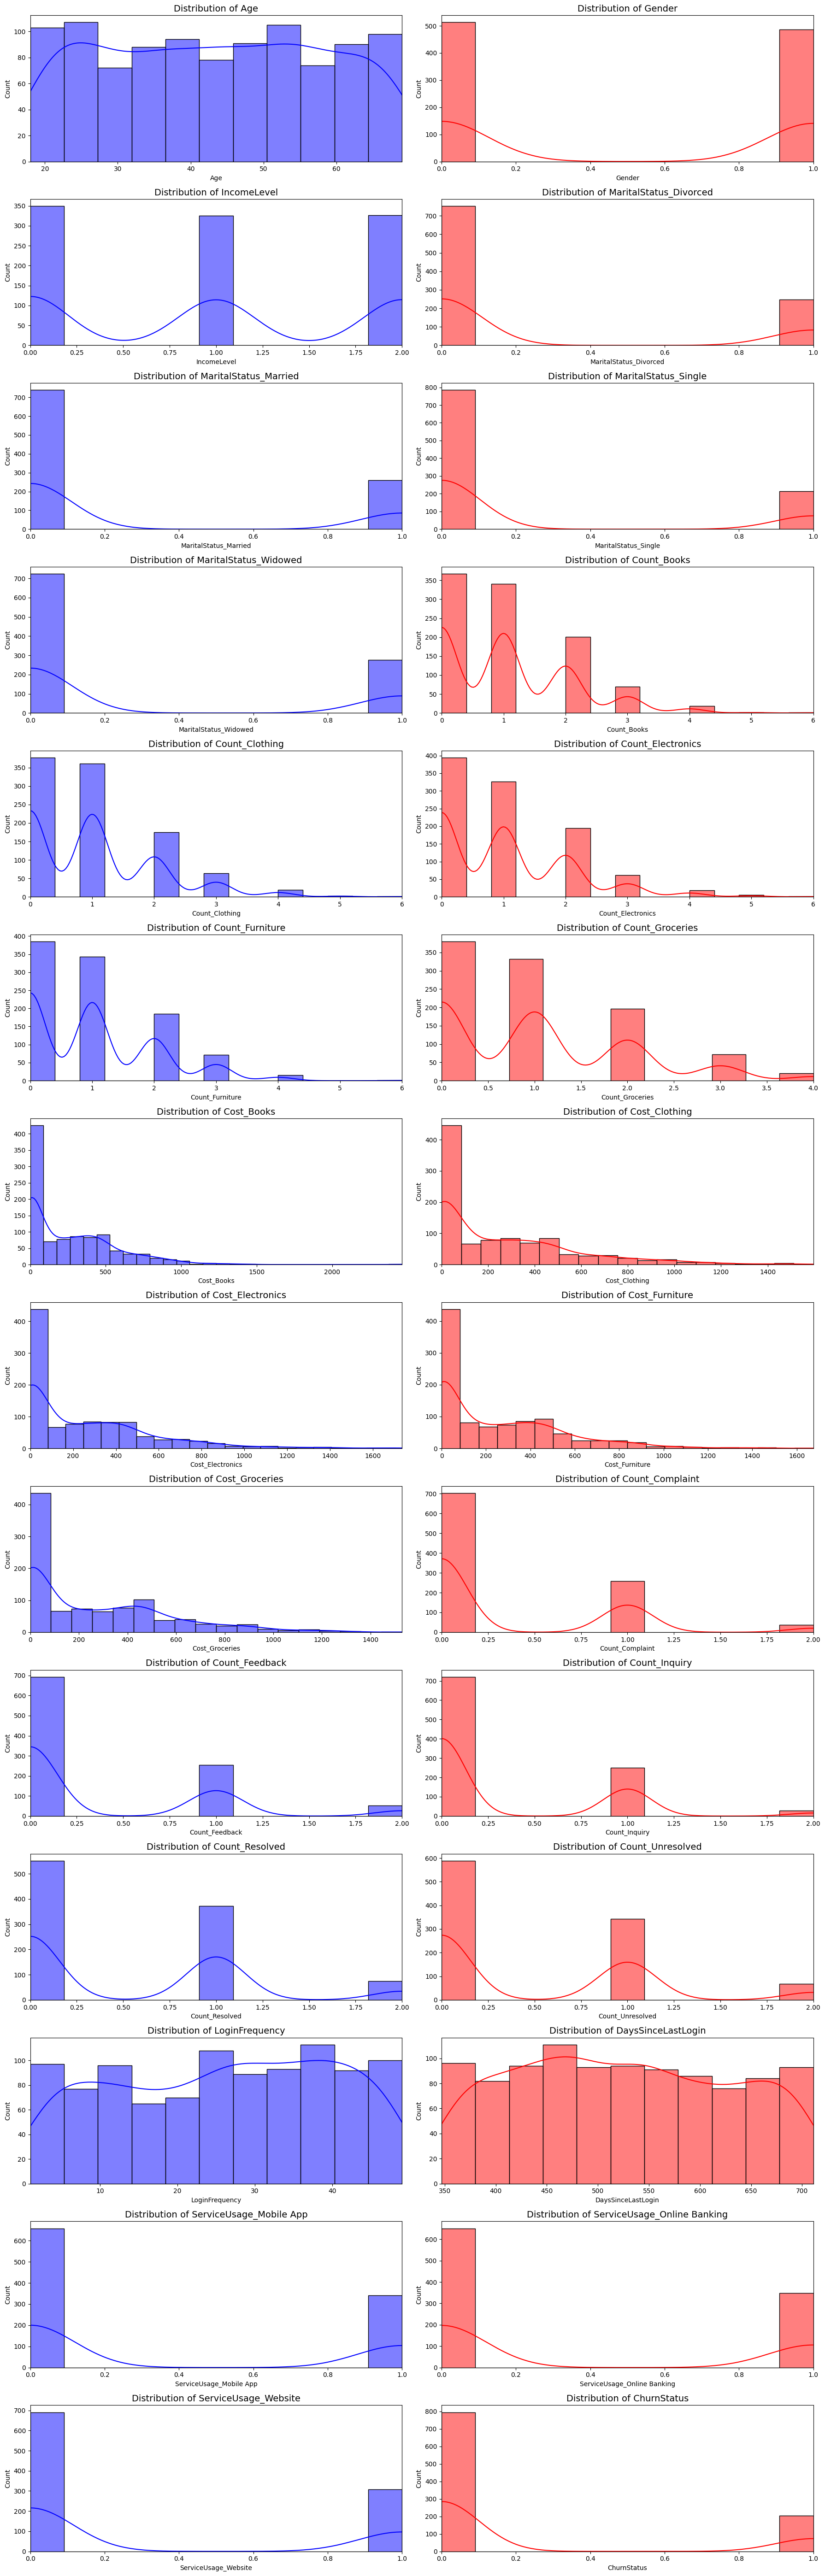

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = merged_df.drop("CustomerID",axis=1).columns

fig, axes = plt.subplots(len(num_cols)//2, 2, figsize=(18, 4 * (len(num_cols)//2)))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(merged_df[col], ax=axes[i], color='b' if i % 2 == 0 else 'r', kde= True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlim([merged_df[col].min(), merged_df[col].max()])

plt.tight_layout()
plt.show()

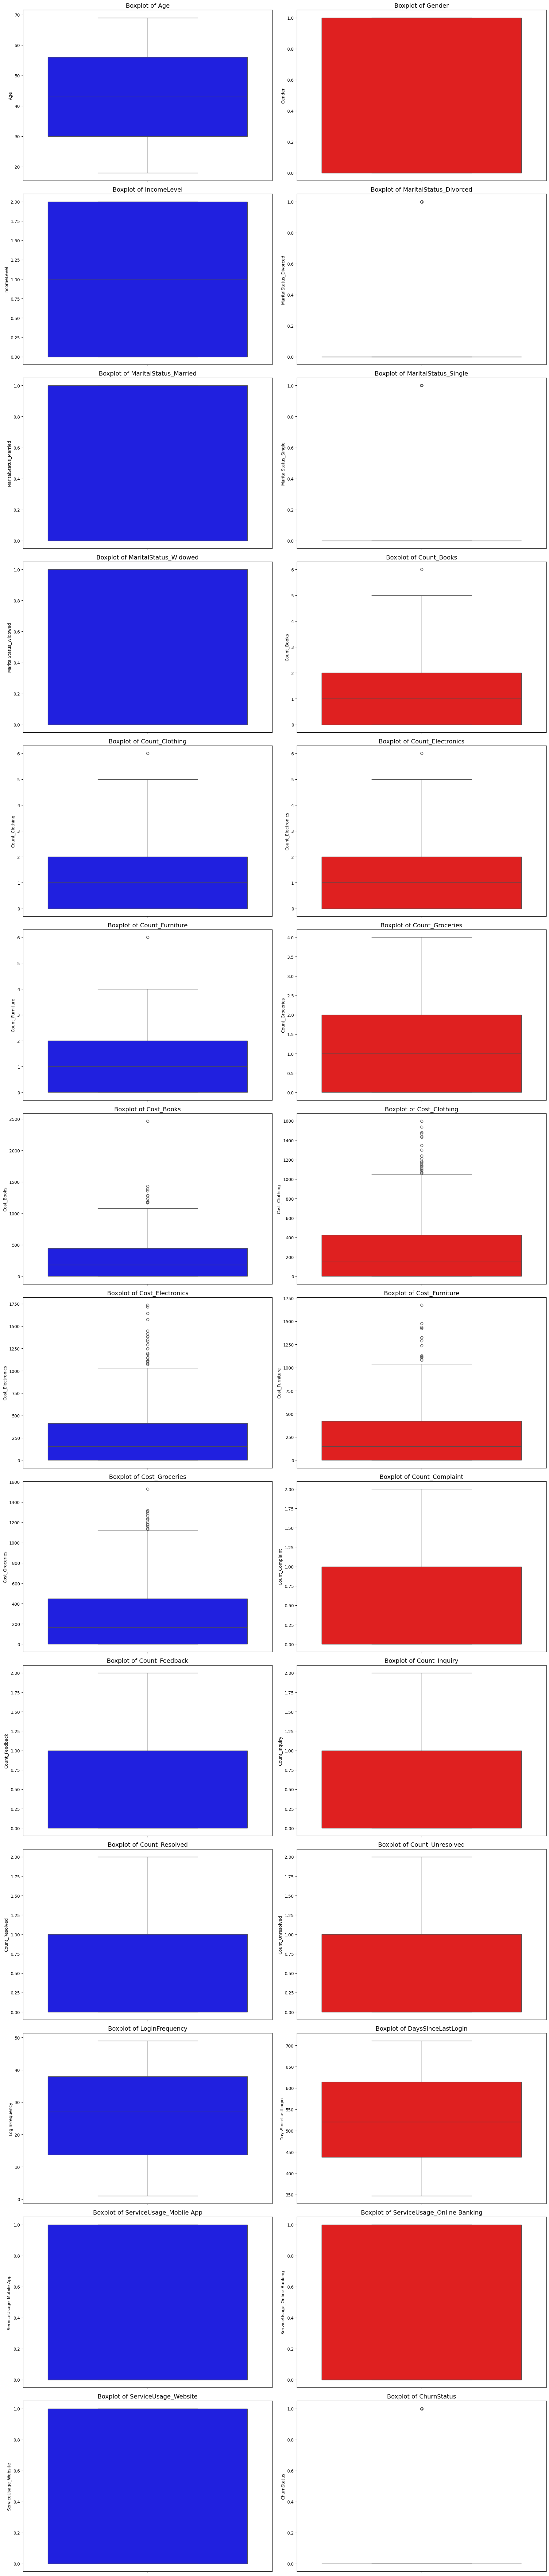

In [29]:
num_cols = merged_df.drop("CustomerID", axis=1).columns  # Assuming "CustomerID" is not needed for plotting

fig, axes = plt.subplots(len(num_cols)//2, 2, figsize=(18, 6 * (len(num_cols)//2)))  
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.boxplot(data=merged_df, y=col, ax=axes[i], color='b' if i % 2 == 0 else 'r')  
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)

plt.tight_layout()
plt.show()

##### Considering the size of data, we would not delete outliers curretly, but it is needed in larger data set.
##### we can do a quick comparison between "ChurnStatus == 0 and 1"

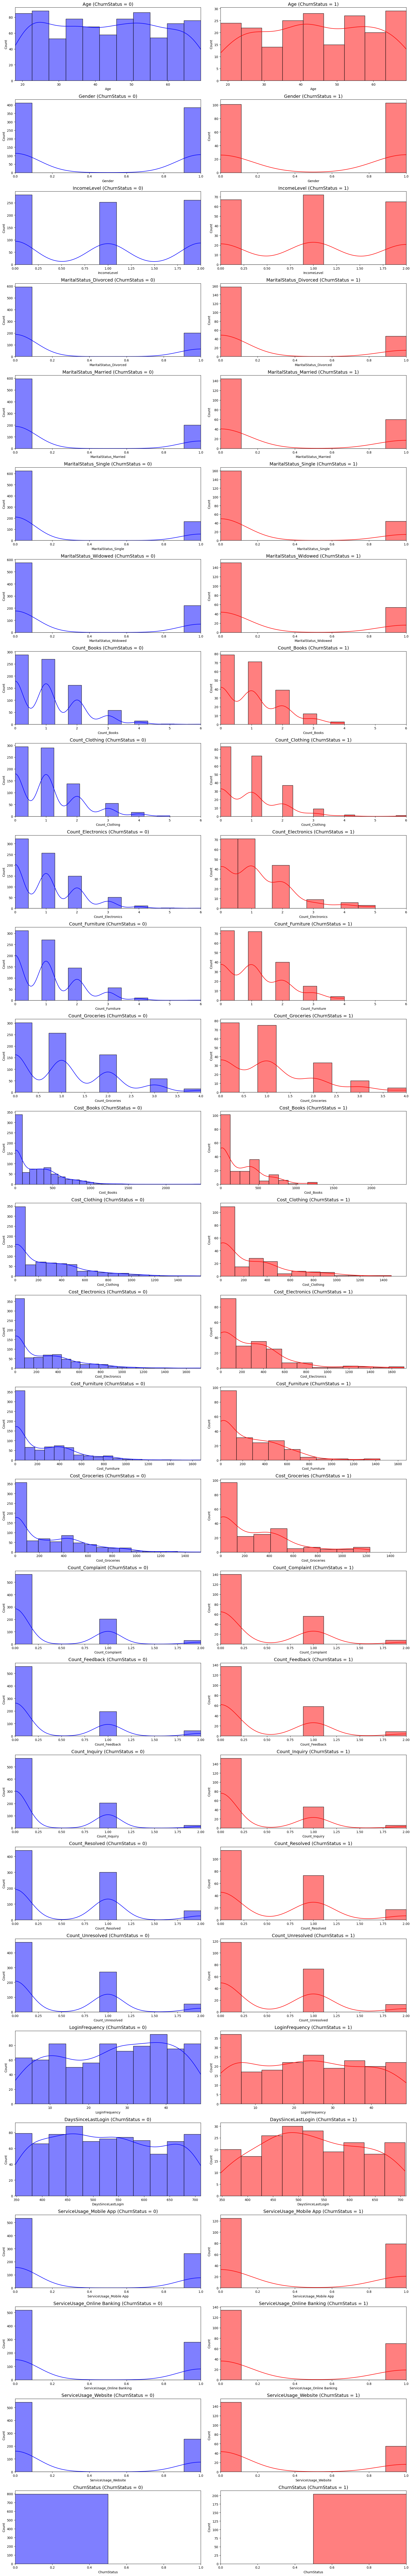

In [30]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(18, 4 * len(num_cols)))  # Two columns for side-by-side plots

for i, col in enumerate(num_cols):
    # Plot for ChurnStatus == 0
    sns.histplot(merged_df[merged_df['ChurnStatus'] == 0][col], ax=axes[i, 0], color='b', kde=True)
    axes[i, 0].set_title(f'{col} (ChurnStatus = 0)', fontsize=14)
    axes[i, 0].set_xlim([merged_df[col].min(), merged_df[col].max()])
    
    # Plot for ChurnStatus == 1
    sns.histplot(merged_df[merged_df['ChurnStatus'] == 1][col], ax=axes[i, 1], color='r', kde=True)
    axes[i, 1].set_title(f'{col} (ChurnStatus = 1)', fontsize=14)
    axes[i, 1].set_xlim([merged_df[col].min(), merged_df[col].max()])

plt.tight_layout()
plt.show()

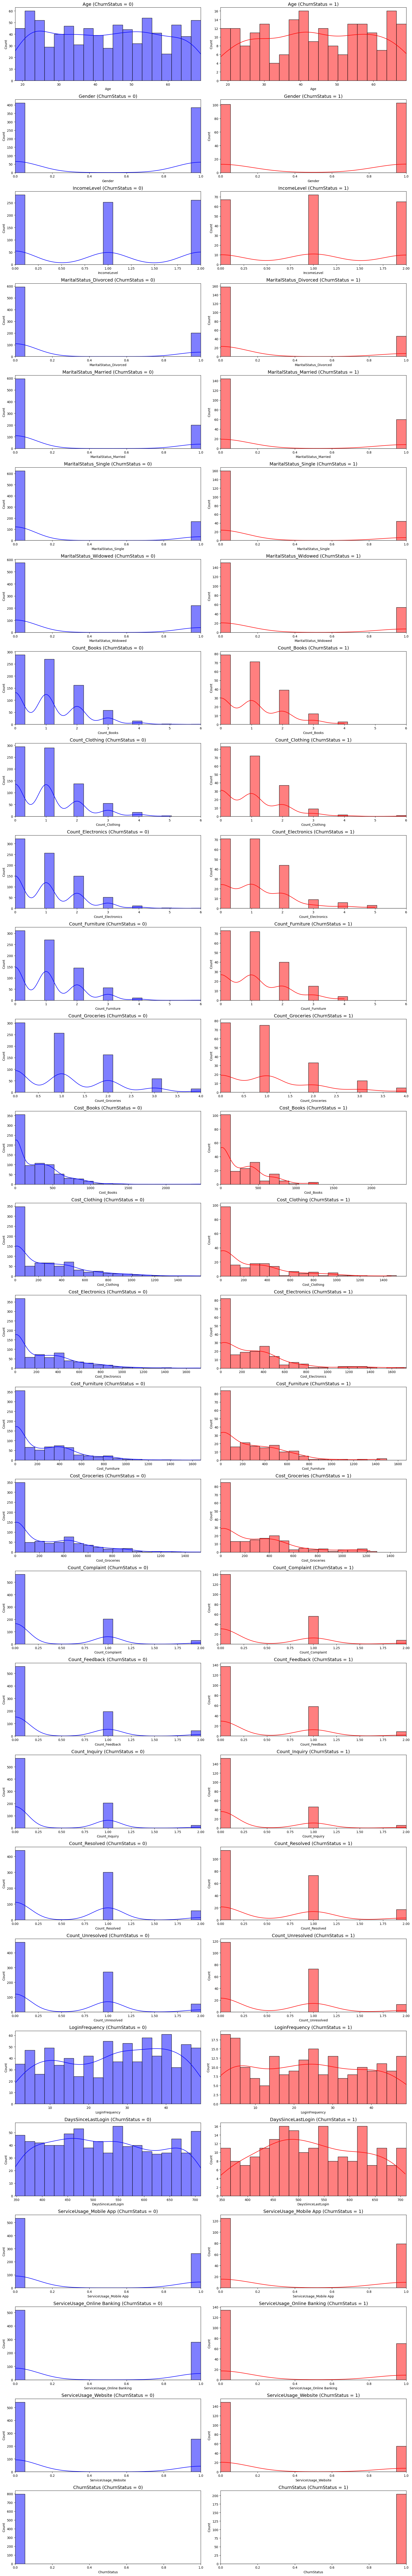

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(num_cols), 2, figsize=(18, 4 * len(num_cols)))  # Two columns for side-by-side plots

for i, col in enumerate(num_cols):
    # Calculate common bin edges
    col_min = merged_df[col].min()
    col_max = merged_df[col].max()
    bin_edges = np.linspace(col_min, col_max, 20)  # 20 bins as an example, adjust as needed

    # Plot for ChurnStatus == 0
    sns.histplot(
        merged_df[merged_df['ChurnStatus'] == 0][col],
        ax=axes[i, 0],
        color='b',
        kde=True,
        bins=bin_edges
    )
    axes[i, 0].set_title(f'{col} (ChurnStatus = 0)', fontsize=14)
    axes[i, 0].set_xlim([col_min, col_max])
    
    # Plot for ChurnStatus == 1
    sns.histplot(
        merged_df[merged_df['ChurnStatus'] == 1][col],
        ax=axes[i, 1],
        color='r',
        kde=True,
        bins=bin_edges
    )
    axes[i, 1].set_title(f'{col} (ChurnStatus = 1)', fontsize=14)
    axes[i, 1].set_xlim([col_min, col_max])

plt.tight_layout()
plt.show()


##### by violin plots, we can make comparisons more easily.

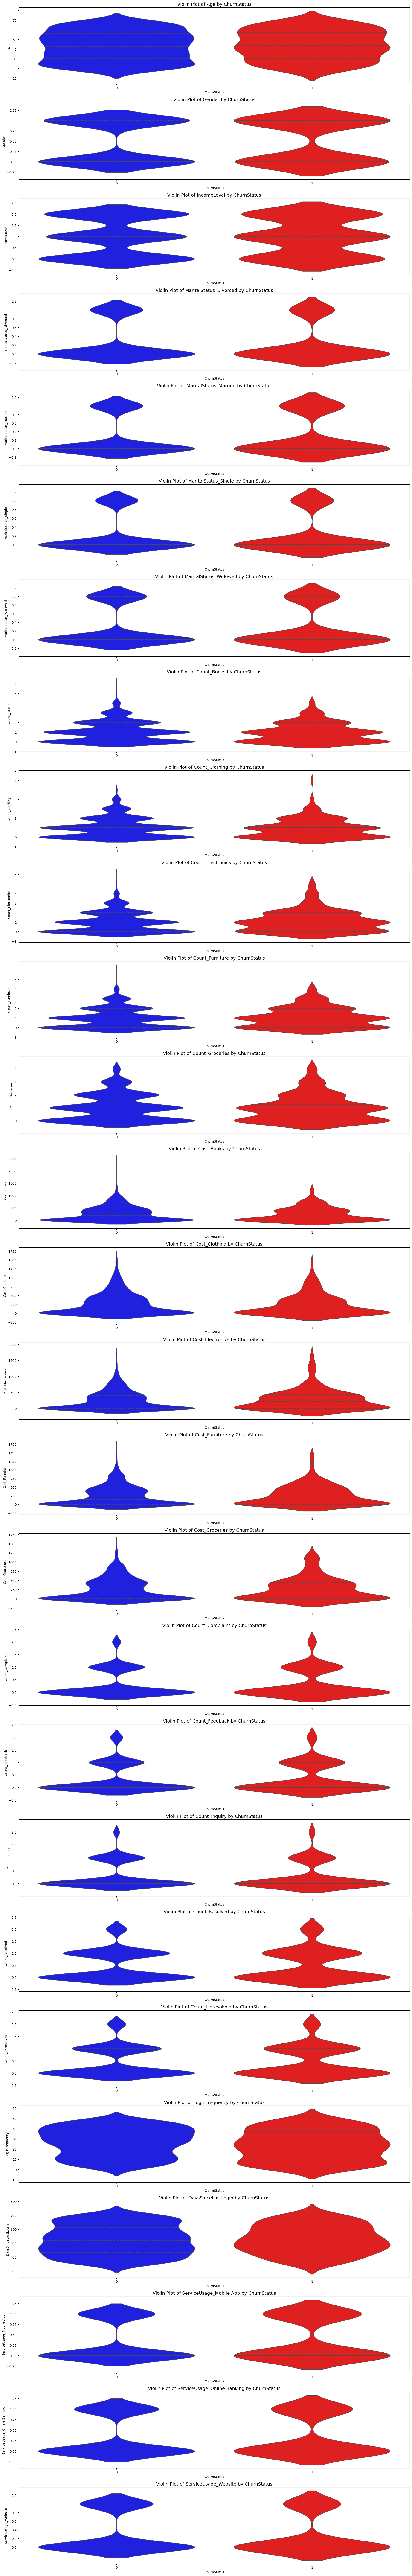

In [31]:
fig, axes = plt.subplots(len(num_cols)-1, 1, figsize=(18, 4 * len(num_cols)))  # Single column of plots

for i, col in enumerate(num_cols):
    
    if col =="ChurnStatus" : continue
    data = merged_df[[col, 'ChurnStatus']].dropna()  
    sns.violinplot(
        data=data,
        x='ChurnStatus',
        y=col,
        ax=axes[i],
        hue='ChurnStatus',
        palette=['b', 'r'],  
        inner='quartile', 
        legend=False  
    )
    axes[i].set_title(f'Violin Plot of {col} by ChurnStatus', fontsize=14)

plt.tight_layout()
plt.show()

#### Normalisation and standardisation
##### because different variable' scales are possiblely far different, we can scale into (0,1) 
##### there are two methods std/rob, we choose rob here.

In [45]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# 初始化缩放器
std_scaler = StandardScaler()

# 获取需要缩放的数值列，排除目标列或不需要缩放的列
num_cols = merged_df.drop(["CustomerID", "ChurnStatus"], axis=1).columns

# 创建一个副本
scaled_df = merged_df.copy()

# 遍历需要缩放的列
for col in num_cols:
    # 缩放数值列
    scaled_df['scaled_' + col] = std_scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))
    # 删除原始列
    scaled_df.drop([col], axis=1, inplace=True)

# 保留目标列或其他未缩放的列
scaled_df['ChurnStatus'] = merged_df['ChurnStatus']  # 或其他未缩放的列


In [46]:
scaled_df

CustomerID  ChurnStatus  scaled_Age  scaled_Gender  scaled_IncomeLevel  \
0             1            0    1.229628       1.026347            0.028006   
1             2            1    1.426547       1.026347            0.028006   
2             3            0   -1.658518       1.026347            0.028006   
3             4            0   -1.461599       1.026347            0.028006   
4             5            0   -1.461599       1.026347            1.245644   
..          ...          ...         ...            ...                 ...   
995         996            0    0.704511      -0.974329            0.028006   
996         997            0   -1.592878       1.026347           -1.189633   
997         998            0    0.245033       1.026347            0.028006   
998         999            0   -1.330319       1.026347           -1.189633   
999        1000            0   -0.608283       1.026347            0.028006   

     scaled_MaritalStatus_Divorced  scaled_MaritalStatus_Married  \
0                        -0.574271                     -0.594289   
1                        -0.574271                      1.682682   
2                        -0.574271                     -0.594289   
3                        -0.574271                     -0.594289   
4                         1.741338                     -0.594289   
..                             ...                           ...   
995                      -0.574271                     -0.594289   
996                      -0.574271                     -0.594289   
997                      -0.574271                      1.682682   
998                      -0.574271                     -0.594289   
999                      -0.574271                     -0.594289   

     scaled_MaritalStatus_Single  scaled_MaritalStatus_Widowed  \
0                       1.910802                     -0.617426   
1                      -0.523341                     -0.617426   
2                       1.910802                     -0.617426   
3                      -0.523341                      1.619626   
4                      -0.523341                     -0.617426   
..                           ...                           ...   
995                     1.910802                     -0.617426   
996                    -0.523341                      1.619626   
997                    -0.523341                     -0.617426   
998                    -0.523341                      1.619626   
999                    -0.523341                      1.619626   

     scaled_Count_Books  ...  scaled_Count_Complaint  scaled_Count_Feedback  \
0             -1.008581  ...               -0.612876               -0.62069   
1             -1.008581  ...               -0.612876               -0.62069   
2             -0.039723  ...               -0.612876               -0.62069   
3             -1.008581  ...               -0.612876               -0.62069   
4             -1.008581  ...               -0.612876               -0.62069   
..                  ...  ...                     ...                    ...   
995           -0.039723  ...               -0.612876               -0.62069   
996           -1.008581  ...               -0.612876               -0.62069   
997           -0.039723  ...               -0.612876               -0.62069   
998           -0.039723  ...               -0.612876               -0.62069   
999            0.929135  ...               -0.612876               -0.62069   

     scaled_Count_Inquiry  scaled_Count_Resolved  scaled_Count_Unresolved  \
0                1.336775               0.754702                -0.771419   
1                1.336775               0.754702                -0.771419   
2                1.336775               0.754702                -0.771419   
3                3.265742               0.754702                 0.839059   
4               -0.592193              -0.827483                -0.771419   
..                    ...          

##### we can also plot the correlations between variables

<Axes: >

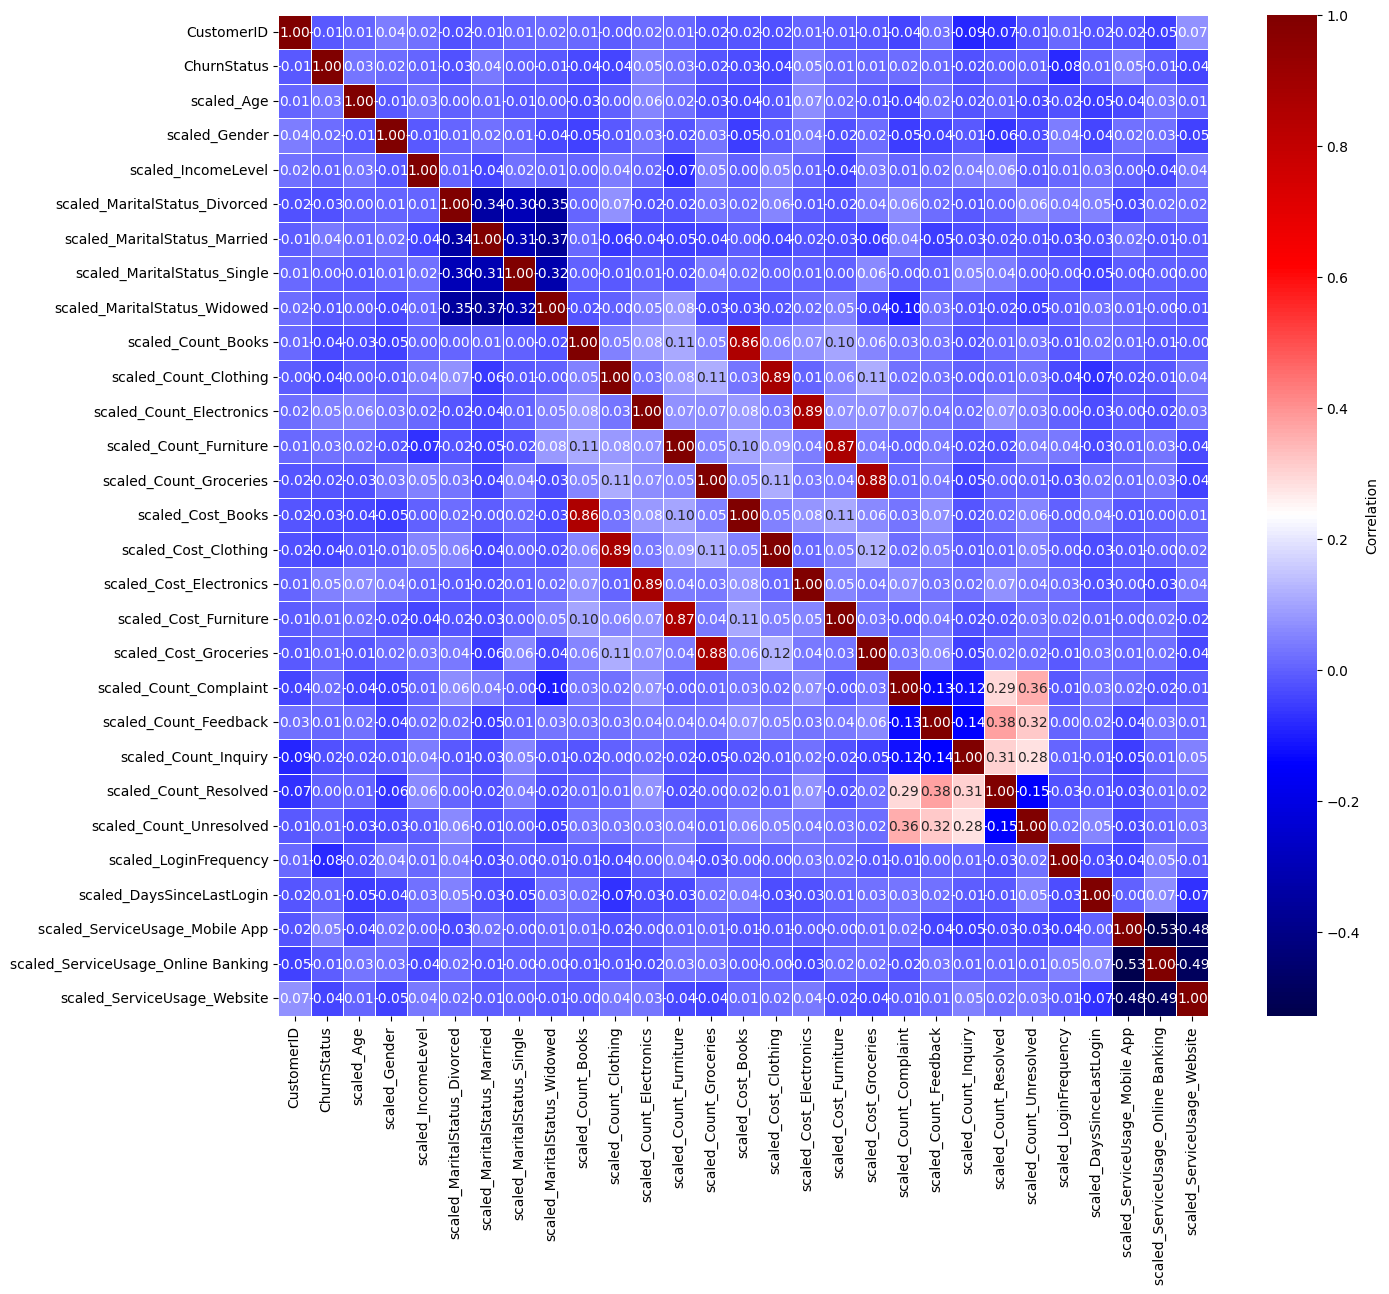

In [47]:
plt.figure(figsize=(15, 13))
sns.heatmap(data=scaled_df.corr(),cmap="seismic", annot=True,fmt=".2f", 
            cbar_kws={'label': 'Correlation'}, linewidths=0.5)


##### From this correlation plot, we can observe:
##### (1) Some variables have strong correlations, such as MaritalStatus, Cost/Count for different products, and ServiceUsage. This could lead to overfitting in our future model development.
##### (2) ChurnStatus shows an extremely weak relationship with other variables, suggesting that additional transformations or operations on the variables might be necessary.

### Prepare data
#### We need to prepare the training data now because the test data should remain blinded until the final step.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
X = scaled_df.drop('ChurnStatus', axis=1)
y = scaled_df['ChurnStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42) # random number for repete
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [49]:
X = train_data.drop('ChurnStatus', axis=1)
y = train_data['ChurnStatus']

##### PCA techniques are used here to reduce dimensions, and we can see that almost all variance can be explained when the number of components exceeds 19.


In [50]:
from sklearn.decomposition import PCA
import numpy as np
X_reduced_pca = PCA(n_components=19, random_state=42).fit_transform(X.values)

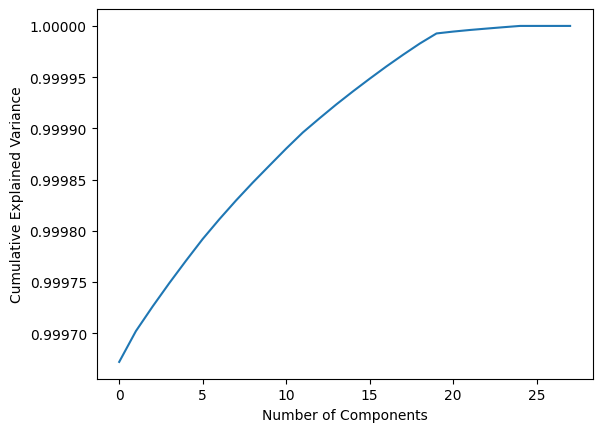

In [38]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

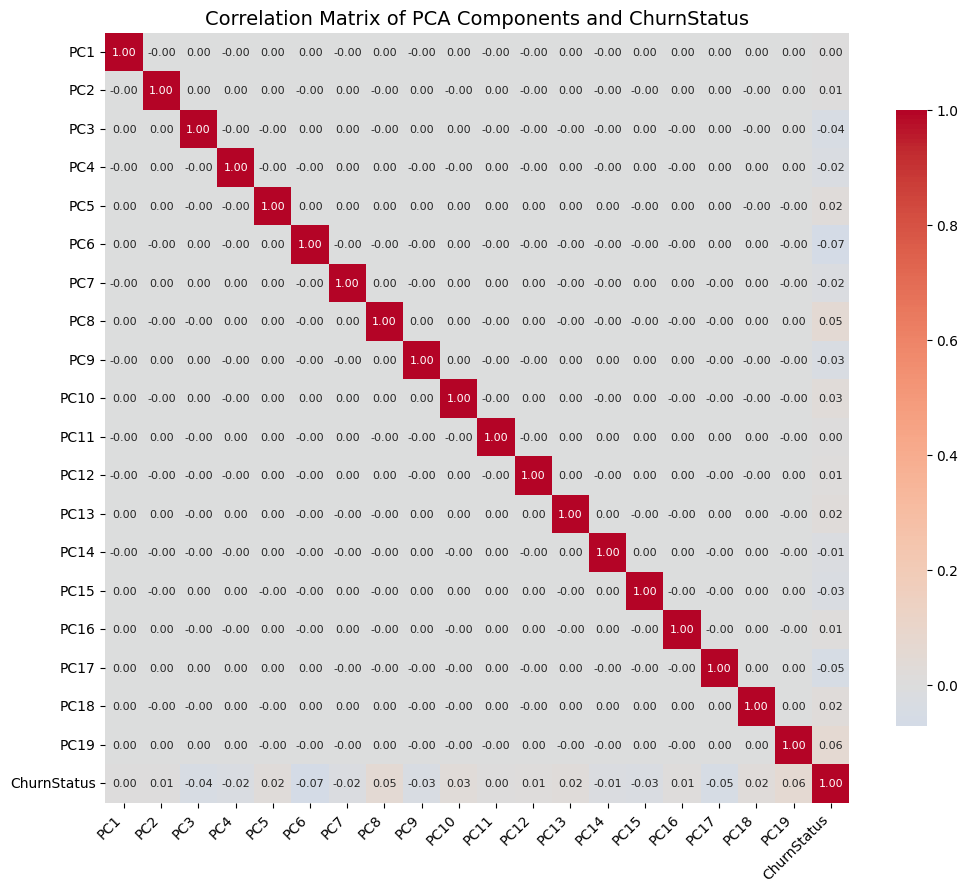

In [51]:
pca_df = pd.DataFrame(X_reduced_pca, columns=[f'PC{i+1}' for i in range(X_reduced_pca.shape[1])])
pca_df['ChurnStatus'] = y.values 

correlation_matrix = pca_df.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap='coolwarm',    
    center=0, 
    cbar_kws={'shrink': 0.8},  
    annot_kws={"size": 8}      
)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)    
plt.title('Correlation Matrix of PCA Components and ChurnStatus', fontsize=14)
plt.show()

#### From the correlation plot, it appears that the correlations with other variables are still small. Perhaps we can use undersampling techniques to prepare the training data.


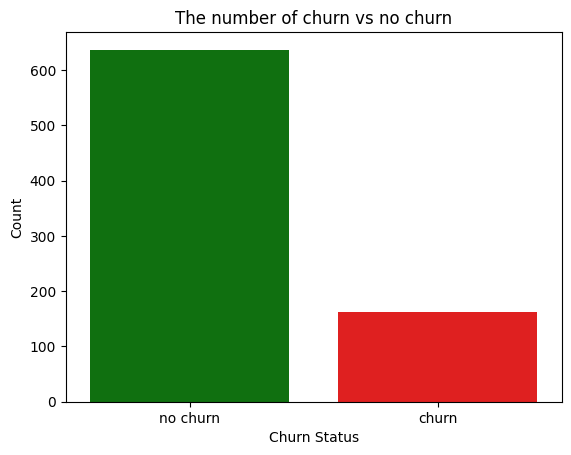

In [52]:
sns.countplot(
    x=pca_df['ChurnStatus'].map({0: 'no churn', 1: 'churn'}),
    hue=pca_df['ChurnStatus'].map({0: 'no churn', 1: 'churn'}),
    palette=["green", "red"],
    dodge=False,
    legend=False
)
plt.title("The number of churn vs no churn")
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.show()

In [53]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -136.370105  1.039258 -3.541156  0.654411  1.247289  2.376942  0.983135   
1   -260.370071  1.218987  1.897714  0.116813 -1.648196 -0.750932 -0.361277   
2     88.630382  3.320922 -1.969256 -0.965534 -0.167086 -0.283030 -0.579435   
3    -16.370386 -2.419151 -1.019635  0.385473  0.970487  0.751506  1.999352   
4    -26.369254 -0.049037  1.609567  2.264328 -1.125151 -1.898406  1.775856   
..          ...       ...       ...       ...       ...       ...       ...   
795  384.629753 -1.961238 -0.583336 -0.141018  2.492529  0.712108  1.965289   
796  196.630626  2.030756 -2.447721 -1.571343  1.482921 -0.868835  0.164353   
797  250.630593 -1.569548 -0.422763  1.956523 -0.773129  0.226348 -0.021425   
798  217.630128 -0.828521  1.444167  1.485208 -1.670170  1.007979 -0.655157   
799 -154.369840  3.040708 -1.354696  0.826935  0.706226  1.260497 -0.385559   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0   -1.596161 -1.179376  1.697804 -0.558619 -0.401882 -0.370309  0.007591   
1   -0.259788 -1.619418  0.191712  0.104193 -2.885217 -2.351170 -2.467376   
2   -0.548692 -0.838593 -0.370090 -2.127632  1.207780  0.139351  0.116193   
3    0.693643 -0.374735  0.623929 -0.016413 -0.195963  0.230676  0.732061   
4    0.468014 -0.885943 -0.480283 -0.718292  2.213164  0.330760 -0.937274   
..        ...       ...       ...       ...       ...       ...       ...   
795  0.496416 -0.374672  1.091419  0.258348 -0.639983  0.023163 -0.384524   
796 -2.617481  0.208434 -0.479582 -1.254501 -1.272084 -1.375998 -0.151975   
797 -1.033992  1.851230 -0.291893 -0.230321 -1.123837 -0.625988 -0.140391   
798 -0.547420  0.617332 -0.910193  1.808235 -0.497624  1.038340 -1.236373   
799 -1.370283 -1.555804 -0.917559  1.526370  0.225053 -1.640782 -0.893795   

         PC15      PC16      PC17      PC18      PC19  ChurnStatus  
0   -0.711615 -0.649451 -1.612179  0.643196 -0.595727            0  
1   -0.763586  0.967917 -0.242142 -2.205151  0.271524            0  
2   -1.755417  0.741421 -2.347949  1.113530 -0.163081            0  
3    0.443487  1.036726 -0.191598  1.191809 -1.347509            1  
4   -0.153941  0.951266 -0.324725 -0.134109  0.379866            1  
..        ...       ...       ...       ...       ...          ...  
795  0.308066 -1.534930 -1.028405  1.191023  0.529868            0  
796 -0.301230 -0.452341  0.492503  0.179449 -1.607371            0  
797 -0.590913  0.100571  0.782804  0.515424 -1.203442            0  
798 -0.762874 -0.527249 -0.838974  0.534834 -1.120657            0  
799 -0.031074 -0.148047  0.333866  1.111423  0.837949            0  

[800 rows x 20 columns]

#### Resampling Techniques
#### To better recognize the characteristics of the churn sample, we use the undersampling method to create balanced samples.

In [55]:
train_data = train_data.sample(frac=1)

# amount of fraud classes rows.
train_data_churn_df = train_data.loc[train_data['ChurnStatus'] == 1]
train_data_non_churn_df = train_data.loc[train_data['ChurnStatus'] == 0][:train_data['ChurnStatus'].value_counts()[1]]

train_data_balanced = pd.concat([train_data_churn_df, train_data_non_churn_df])

# Shuffle dataframe rows
train_data_df_balanced = train_data_balanced.sample(frac=1, random_state=42)

train_data_df_balanced

CustomerID  scaled_Age  scaled_Gender  scaled_IncomeLevel  \
291         292   -1.133400       1.026347            1.245644   
122         123   -0.805202       1.026347            1.245644   
755         756   -0.017526      -0.974329            1.245644   
564         565    1.689106       1.026347            0.028006   
936         937   -0.608283       1.026347            1.245644   
..          ...         ...            ...                 ...   
460         461    0.770150      -0.974329           -1.189633   
70           71   -1.592878      -0.974329            0.028006   
898         899   -1.264680       1.026347           -1.189633   
356         357   -1.461599       1.026347           -1.189633   
994         995   -1.330319      -0.974329            0.028006   

     scaled_MaritalStatus_Divorced  scaled_MaritalStatus_Married  \
291                      -0.574271                     -0.594289   
122                      -0.574271                     -0.594289   
755                      -0.574271                     -0.594289   
564                      -0.574271                     -0.594289   
936                      -0.574271                     -0.594289   
..                             ...                           ...   
460                      -0.574271                      1.682682   
70                        1.741338                     -0.594289   
898                      -0.574271                     -0.594289   
356                       1.741338                     -0.594289   
994                       1.741338                     -0.594289   

     scaled_MaritalStatus_Single  scaled_MaritalStatus_Widowed  \
291                     1.910802                     -0.617426   
122                    -0.523341                      1.619626   
755                    -0.523341                      1.619626   
564                     1.910802                     -0.617426   
936                    -0.523341                      1.619626   
..                           ...                           ...   
460                    -0.523341                     -0.617426   
70                     -0.523341                     -0.617426   
898                    -0.523341                      1.619626   
356                    -0.523341                     -0.617426   
994                    -0.523341                     -0.617426   

     scaled_Count_Books  scaled_Count_Clothing  ...  scaled_Count_Feedback  \
291           -0.039723               0.974972  ...               2.827586   
122           -1.008581              -0.974972  ...              -0.620690   
755            0.929135              -0.974972  ...              -0.620690   
564           -0.039723              -0.974972  ...              -0.620690   
936            0.929135               0.000000  ...               1.103448   
..                  ...                    ...  ...                    ...   
460           -1.008581              -0.974972  ...               1.103448   
70            -1.008581               0.000000  ...               1.103448   
898           -1.008581              -0.974972  ...               1.103448   
356            0.929135              -0.974972  ...               1.103448   
994           -1.008581               0.974972  ...              -0.620690   

     scaled_Count_Inquiry  scaled_Count_Resolved  scaled_Count_Unresolved  \
291             -0.592193               0.754702                 0.839059   
122              3.265742               2.336888                -0.771419   
755             -0.592193              -0.827483                -0.771419   
564              3.265742               0.754702                 0.839059   
936             -0.592193               0.754702                 0.839059   
..                    ...                    ...                      ...   
460              1.336775              -0.827483                 2.449536   
70               1.336775               0.754702 

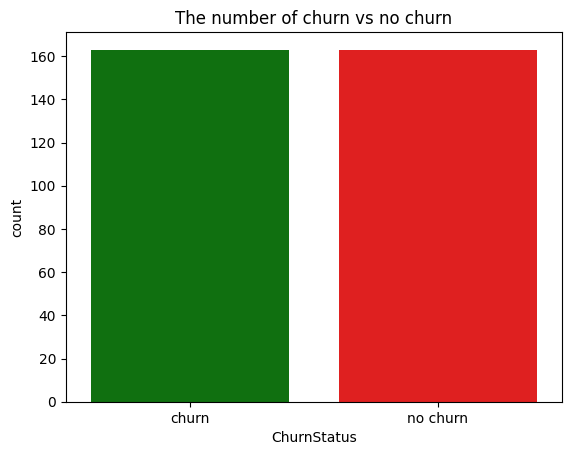

In [57]:
sns.countplot(x=train_data_balanced['ChurnStatus'].map({0: 'no churn', 1: 'churn'}), hue=train_data_balanced['ChurnStatus'].map({0: 'no churn', 1: 'churn'}), palette=["green", "red"], dodge=False)
plt.title("The number of churn vs no churn")
plt.show()

In [61]:
X_balanced = train_data_balanced.drop('ChurnStatus', axis=1)
y_balanced = train_data_balanced['ChurnStatus']

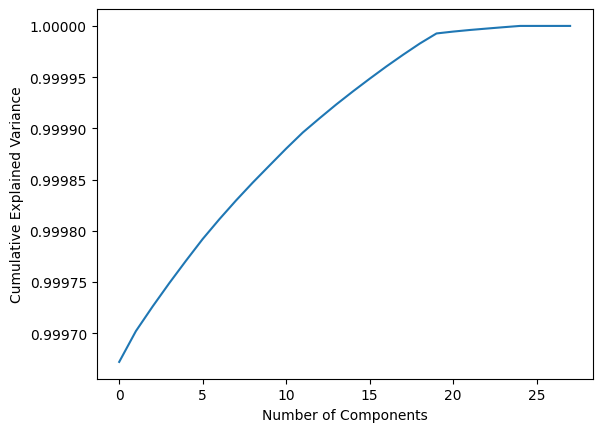

In [62]:
ca = PCA().fit(X_balanced)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [63]:
pca = PCA(n_components=19, random_state=42)
Xb_reduced_pca = pca.fit_transform(X_balanced.values)

In [64]:
pca_df_balanced = pd.DataFrame(Xb_reduced_pca, columns=[f'PC{i+1}' for i in range(Xb_reduced_pca.shape[1])])
pca_df_balanced['ChurnStatus'] = y_balanced.values  
pca_df_balanced.sample(frac=1, random_state=42)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
234 -236.996062  2.923657  0.758684 -0.544732  0.735337 -1.589580 -0.513607   
110 -405.996404 -1.163481 -2.060069  0.288286 -0.772603  0.177011 -1.119225   
249  227.003679  1.062470 -0.113915  0.404021 -3.103090 -0.514595  1.871234   
9     36.003580  1.811595  1.980262  1.005242 -2.018195 -3.971950 -1.466198   
93   408.003047  1.918250 -3.413318 -0.107140 -1.241799  0.652288  1.071918   
..          ...       ...       ...       ...       ...       ...       ...   
188  -67.997611 -2.083382 -0.278637  0.088657  1.211905 -0.847309 -0.156697   
71  -457.997784 -0.777629 -1.239509 -2.144737 -0.219876 -1.170791 -0.877867   
106  370.005084 -2.241877  0.857035 -1.055104  1.233640 -1.444236  2.019817   
270 -171.998640 -0.956017 -0.201708  0.167802  0.085718 -1.041137  1.436161   
102  466.002860 -0.058326  0.030337 -1.336491  1.097564 -0.756083 -1.051654   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
234  0.643646 -1.991775  0.110502 -0.087628  0.711632  0.949205 -0.994679   
110  1.136693 -2.046331 -0.481609 -2.018871 -1.969320 -0.496334  1.570446   
249  1.717654 -0.500952 -0.479287  0.424517  0.594445 -1.197724  0.514996   
9   -0.898513 -3.235507  0.659704  0.680417 -1.514316  0.131350  1.020975   
93   1.047849 -0.314620 -1.275875 -1.162228 -0.687581  0.022125  0.835817   
..        ...       ...       ...       ...       ...       ...       ...   
188 -1.941884  1.326101 -0.778809 -0.096318 -0.608753  3.105920  0.352595   
71  -0.707455  1.134287  1.145399 -0.978363 -1.399555  0.472975 -1.237665   
106  1.384393 -0.313042 -1.303331 -0.555281 -0.087041  1.320398 -1.086858   
270 -2.380322  1.445596  1.129426 -0.626252 -0.444213  0.397240 -0.987796   
102  0.296493 -0.059385  1.428541  0.911437 -1.744968 -1.576692 -0.767817   

         PC15      PC16      PC17      PC18      PC19  ChurnStatus  
234  0.943615  2.243576 -0.896845 -0.187381  2.120202            0  
110  1.918597 -1.527408 -1.558117 -1.374778 -0.660428            1  
249 -0.163217  0.148842 -0.450639  0.063306 -1.450731            0  
9    0.116492 -0.483168  0.837542 -1.973770 -0.056715            1  
93   0.879311  0.506422  0.368304  0.068635  0.631272            1  
..        ...       ...       ...       ...       ...          ...  
188 -1.169947  0.557960 -0.588392 -0.363210 -1.348803            0  
71   0.282873  0.918976 -1.976727 -1.084912 -0.291821            1  
106 -0.160889 -0.893403  0.124499 -0.180277  1.421018            1  
270  1.286931  0.064065 -1.569050 -1.745499  0.903479            0  
102  0.129280 -0.644572 -1.503464 -0.904060 -0.088681            1  

[326 rows x 20 columns]

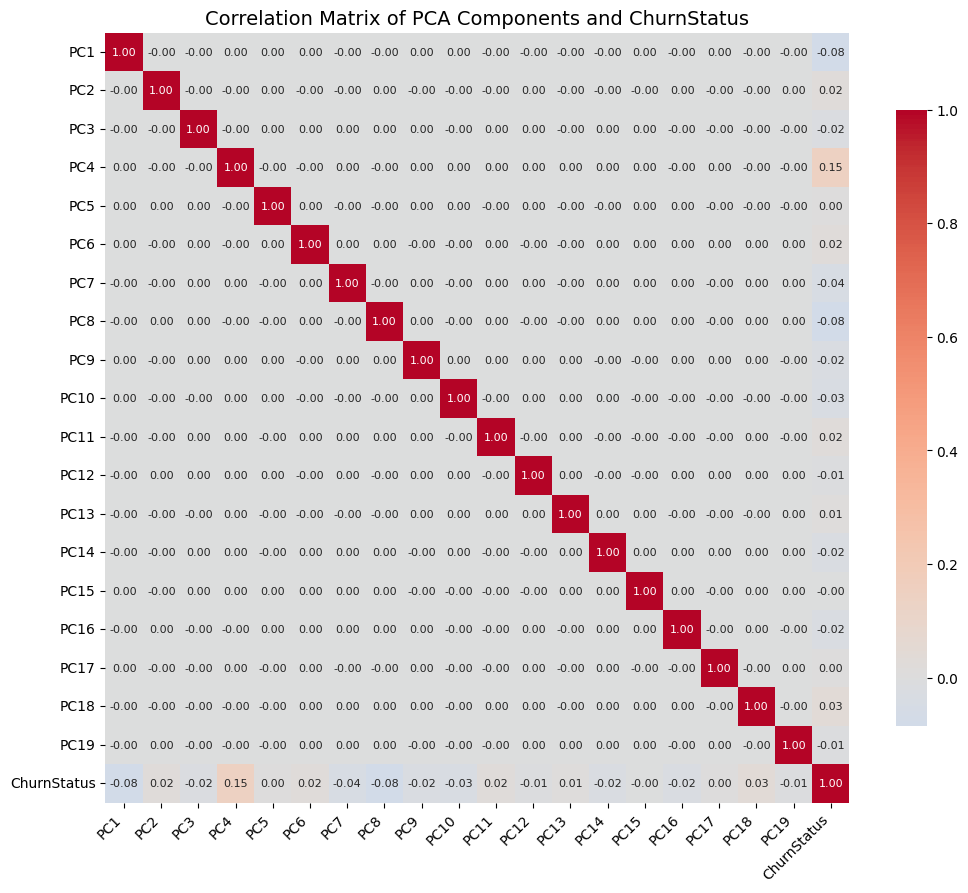

In [65]:
correlation_matrix_balanced = pca_df_balanced.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(
    correlation_matrix_balanced, 
    annot=True,          # Keep annotations to display values
    fmt=".2f",           # Set format to 2 decimal places
    cmap='coolwarm',     # Change color map as needed
    center=0, 
    cbar_kws={'shrink': 0.8},  # Adjust the color bar size
    annot_kws={"size": 8}      # Adjust annotation font size
)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust x-axis ticks font size and rotation
plt.yticks(fontsize=10)                           # Adjust y-axis ticks font size
plt.title('Correlation Matrix of PCA Components and ChurnStatus', fontsize=14)
plt.show()

In [68]:
X_test

CustomerID  scaled_Age  scaled_Gender  scaled_IncomeLevel  \
864         865   -1.002121      -0.974329            1.245644   
920         921    0.901430      -0.974329           -1.189633   
474         475    0.704511      -0.974329           -1.189633   
83           84   -0.870842       1.026347            1.245644   
201         202    0.507592      -0.974329            1.245644   
..          ...         ...            ...                 ...   
397         398    0.179393      -0.974329            0.028006   
174         175    0.967069       1.026347            1.245644   
539         540   -0.280085      -0.974329            1.245644   
126         127   -1.067761      -0.974329            1.245644   
590         591    1.295268      -0.974329            1.245644   

     scaled_MaritalStatus_Divorced  scaled_MaritalStatus_Married  \
864                      -0.574271                     -0.594289   
920                      -0.574271                     -0.594289   
474                      -0.574271                      1.682682   
83                        1.741338                     -0.594289   
201                      -0.574271                     -0.594289   
..                             ...                           ...   
397                       1.741338                     -0.594289   
174                      -0.574271                      1.682682   
539                      -0.574271                     -0.594289   
126                      -0.574271                      1.682682   
590                       1.741338                     -0.594289   

     scaled_MaritalStatus_Single  scaled_MaritalStatus_Widowed  \
864                    -0.523341                      1.619626   
920                     1.910802                     -0.617426   
474                    -0.523341                     -0.617426   
83                     -0.523341                     -0.617426   
201                    -0.523341                      1.619626   
..                           ...                           ...   
397                    -0.523341                     -0.617426   
174                    -0.523341                     -0.617426   
539                     1.910802                     -0.617426   
126                    -0.523341                     -0.617426   
590                    -0.523341                     -0.617426   

     scaled_Count_Books  scaled_Count_Clothing  ...  scaled_Count_Complaint  \
864            0.929135               2.924916  ...               -0.612876   
920           -1.008581               0.000000  ...               -0.612876   
474            1.897993              -0.974972  ...                1.216605   
83            -0.039723               0.000000  ...               -0.612876   
201           -1.008581              -0.974972  ...               -0.612876   
..                  ...                    ...  ...                     ...   
397           -0.039723               0.000000  ...               -0.612876   
174            1.897993              -0.974972  ...               -0.612876   
539           -0.039723               0.000000  ...               -0.612876   
126           -1.008581               0.000000  ...               -0.612876   
590           -1.008581              -0.974972  ...                1.216605   

     scaled_Count_Feedback  scaled_Count_Inquiry  scaled_Count_Resolved  \
864              -0.620690              1.336775              -0.827483   
920              -0.620690              1.336775              -0.827483   
474              -0.620690             -0.592193               0.754702   
83               -0.620690             -0.592193              -0.827483   
201               1.103448              1.336775               2.336888   
..                     ...                   ...                    ...   
397               1.103448             -0.592193               0.754702   
174              -0.620690              3.265742     

In [72]:
X_test

CustomerID  scaled_Age  scaled_Gender  scaled_IncomeLevel  \
864         865   -1.002121      -0.974329            1.245644   
920         921    0.901430      -0.974329           -1.189633   
474         475    0.704511      -0.974329           -1.189633   
83           84   -0.870842       1.026347            1.245644   
201         202    0.507592      -0.974329            1.245644   
..          ...         ...            ...                 ...   
397         398    0.179393      -0.974329            0.028006   
174         175    0.967069       1.026347            1.245644   
539         540   -0.280085      -0.974329            1.245644   
126         127   -1.067761      -0.974329            1.245644   
590         591    1.295268      -0.974329            1.245644   

     scaled_MaritalStatus_Divorced  scaled_MaritalStatus_Married  \
864                      -0.574271                     -0.594289   
920                      -0.574271                     -0.594289   
474                      -0.574271                      1.682682   
83                        1.741338                     -0.594289   
201                      -0.574271                     -0.594289   
..                             ...                           ...   
397                       1.741338                     -0.594289   
174                      -0.574271                      1.682682   
539                      -0.574271                     -0.594289   
126                      -0.574271                      1.682682   
590                       1.741338                     -0.594289   

     scaled_MaritalStatus_Single  scaled_MaritalStatus_Widowed  \
864                    -0.523341                      1.619626   
920                     1.910802                     -0.617426   
474                    -0.523341                     -0.617426   
83                     -0.523341                     -0.617426   
201                    -0.523341                      1.619626   
..                           ...                           ...   
397                    -0.523341                     -0.617426   
174                    -0.523341                     -0.617426   
539                     1.910802                     -0.617426   
126                    -0.523341                     -0.617426   
590                    -0.523341                     -0.617426   

     scaled_Count_Books  scaled_Count_Clothing  ...  scaled_Count_Complaint  \
864            0.929135               2.924916  ...               -0.612876   
920           -1.008581               0.000000  ...               -0.612876   
474            1.897993              -0.974972  ...                1.216605   
83            -0.039723               0.000000  ...               -0.612876   
201           -1.008581              -0.974972  ...               -0.612876   
..                  ...                    ...  ...                     ...   
397           -0.039723               0.000000  ...               -0.612876   
174            1.897993              -0.974972  ...               -0.612876   
539           -0.039723               0.000000  ...               -0.612876   
126           -1.008581               0.000000  ...               -0.612876   
590           -1.008581              -0.974972  ...                1.216605   

     scaled_Count_Feedback  scaled_Count_Inquiry  scaled_Count_Resolved  \
864              -0.620690              1.336775              -0.827483   
920              -0.620690              1.336775              -0.827483   
474              -0.620690             -0.592193               0.754702   
83               -0.620690             -0.592193              -0.827483   
201               1.103448              1.336775               2.336888   
..                     ...                   ...                    ...   
397               1.103448             -0.592193               0.754702   
174              -0.620690              3.265742     

In [73]:
X_test_pca = pca.transform(X_test)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
X_test_pca_df['ChurnStatus'] = y_test.values  # 添加目标列
X_test_pca_df['CustomerID'] = X_test['CustomerID'].values

# 5. 保存为 CSV 文件
X_test_pca_df.to_csv("test_data_pca.csv", index=False)

/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [74]:
pca_df_balanced.to_csv("train_data_pca.csv")

#### From correlation matrix, correlation between PC3, PC8, PC9, PC11, PC19 and ChurnStatus >=0.05

##### Extract the components (or loadings) from a fitted PCA model, and mainly focus on these varibales with large correlation

In [66]:
loadings = pca.components_ 
print(loadings.shape)  
feature_names = X_balanced.columns
loading_matrix = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(19)])
print(loading_matrix)

(19, 28)
                                         PC1       PC2       PC3       PC4  \
CustomerID                          1.000000 -0.000137 -0.000114 -0.000013   
scaled_Age                          0.000098  0.060505  0.075789  0.065558   
scaled_Gender                       0.000052  0.001993  0.040571  0.073400   
scaled_IncomeLevel                 -0.000038  0.057591  0.014269 -0.022360   
scaled_MaritalStatus_Divorced      -0.000028 -0.005401 -0.047052 -0.065677   
scaled_MaritalStatus_Married       -0.000036 -0.060669  0.042699 -0.022387   
scaled_MaritalStatus_Single        -0.000020  0.079098  0.025355 -0.015990   
scaled_MaritalStatus_Widowed        0.000084 -0.013028 -0.021003  0.104054   
scaled_Count_Books                  0.000017  0.291482 -0.008267  0.047161   
scaled_Count_Clothing               0.000072  0.164731 -0.276250 -0.092733   
scaled_Count_Electronics            0.000105  0.290390  0.378896 -0.097904   
scaled_Count_Furniture              0.000064  0.212584 

In [71]:
import pandas as pd

feature_names = X_balanced.columns

loading_matrix = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(loadings.shape[0])])

pcs_to_check = ['PC3', 'PC8', 'PC9', 'PC10', 'PC11', 'PC19']

top_features_per_pc = {}
for pc in pcs_to_check:
    top_features = loading_matrix[pc].abs().sort_values(ascending=False).head()
    top_features_per_pc[pc] = top_features

top_features_df = pd.DataFrame(top_features_per_pc)
print(top_features_df)



                                         PC3       PC8       PC9      PC10  \
scaled_Cost_Clothing                0.384351  0.203406       NaN       NaN   
scaled_Cost_Electronics             0.624948       NaN       NaN       NaN   
scaled_Cost_Groceries               0.351827       NaN       NaN       NaN   
scaled_Count_Clothing               0.276250       NaN       NaN       NaN   
scaled_Count_Complaint                   NaN       NaN  0.556030  0.298077   
scaled_Count_Electronics            0.378896       NaN       NaN       NaN   
scaled_Count_Feedback                    NaN  0.347114  0.304685  0.482479   
scaled_Count_Inquiry                     NaN  0.208116       NaN       NaN   
scaled_Count_Resolved                    NaN  0.756645       NaN       NaN   
scaled_DaysSinceLastLogin                NaN       NaN  0.368005       NaN   
scaled_Gender                            NaN       NaN       NaN       NaN   
scaled_IncomeLevel                       NaN       NaN       NaN

#### The number of times the main variables appear in the loading matrix

In [72]:
feature_counts = top_features_df.notna().sum(axis=1)
feature_counts = feature_counts[feature_counts > 0]  
print(feature_counts)

scaled_Cost_Clothing                  2
scaled_Cost_Electronics               1
scaled_Cost_Groceries                 1
scaled_Count_Clothing                 1
scaled_Count_Complaint                2
scaled_Count_Electronics              1
scaled_Count_Feedback                 3
scaled_Count_Inquiry                  2
scaled_Count_Resolved                 2
scaled_DaysSinceLastLogin             1
scaled_Gender                         1
scaled_IncomeLevel                    1
scaled_LoginFrequency                 3
scaled_MaritalStatus_Single           1
scaled_MaritalStatus_Widowed          1
scaled_ServiceUsage_Mobile App        3
scaled_ServiceUsage_Online Banking    3
scaled_ServiceUsage_Website           1
dtype: int64


In [66]:
#by sample technics we enhanced the correlations between some varibales like PC6, PC7, PC11, PC12, PC16, PC17, PC19 and ChurnStatus
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(Xb_reduced_pca)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(Xb_reduced_pca)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(Xb_reduced_pca)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

NameError: name 'time' is not defined

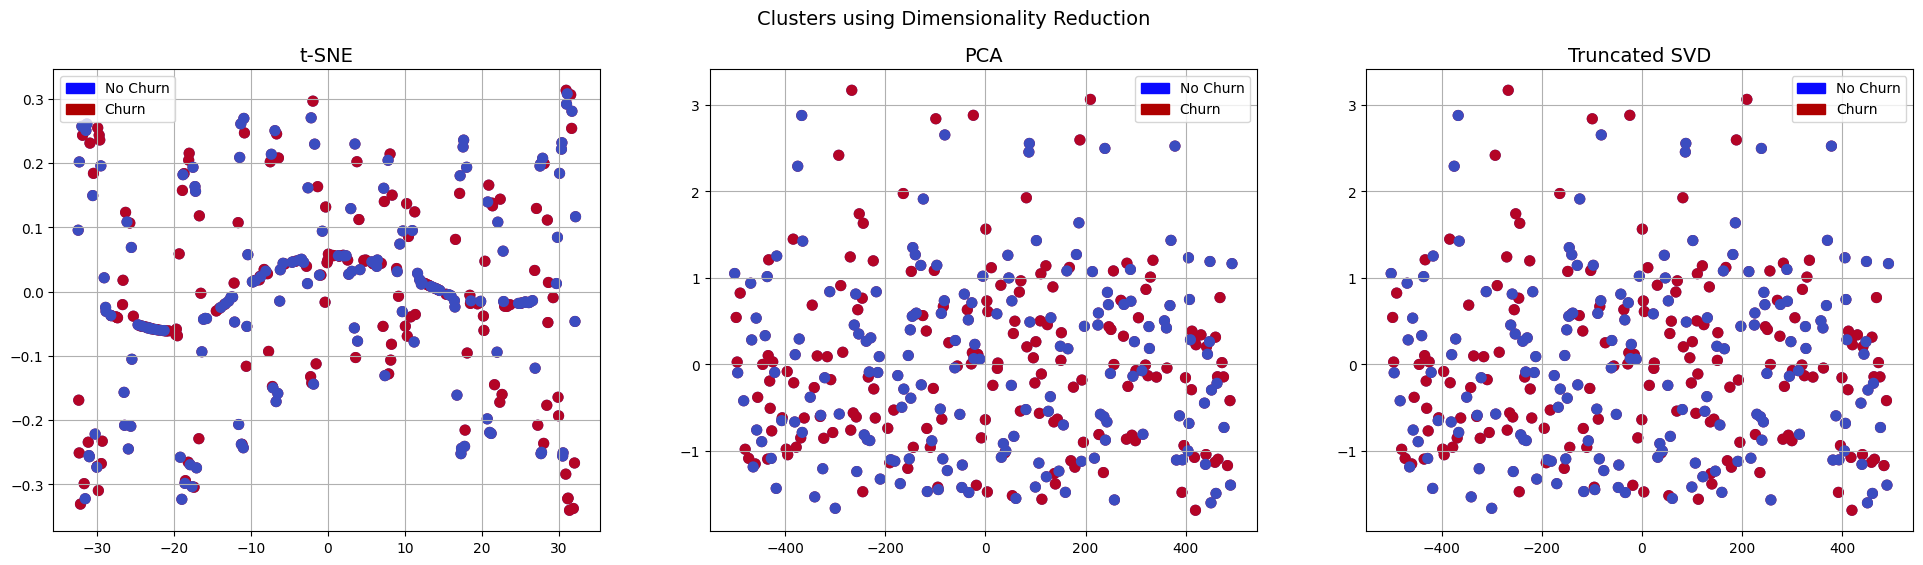

In [185]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Churn')
red_patch = mpatches.Patch(color='#AF0000', label='Churn')

y = y_balanced
# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Churn', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Churn', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Churn', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Churn', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Churn', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Churn', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [186]:
X_train = pca_df_balanced.drop('ChurnStatus', axis=1).values

y_train = pca_df_balanced['ChurnStatus'].values

In [187]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
#log_reg_params = {"penalty": ['l1', 'l2'], 'C': np.logspace(0, 4, 10, 100, 1000),'max_iter': [10000]}
log_reg_params = {
    "penalty": ['l1', 'l2'],
    'C': np.logspace(0, 4, 10),
    'solver': ['liblinear', 'saga'],  # 为 'l1' 和 'l2' 添加兼容的求解器
    'max_iter': [10000]
}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_



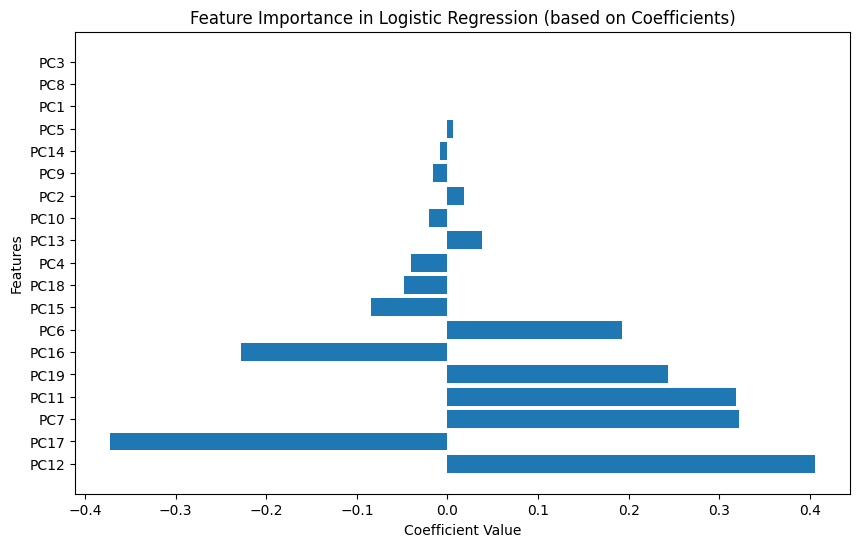

In [188]:
if hasattr(log_reg, 'coef_'):
    coefficients = log_reg.coef_[0]  
    features = np.array(list(pca_df_balanced.drop('ChurnStatus', axis=1).columns))  

    sorted_idx = np.argsort(np.abs(coefficients))[::-1]  
    sorted_features = features[sorted_idx]
    sorted_coefficients = coefficients[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_coefficients)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Feature Importance in Logistic Regression (based on Coefficients)")
    plt.show()



In [189]:
knears_params = {"n_neighbors": list(range(2,12,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

#considering the svc perfermance is not good, we applied the randomforest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [2, 5],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 100, 200]
}



rf = RandomForestClassifier(class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 2/5; 2/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100[CV 3/5; 1/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50

[CV 4/5; 1/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 2/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 1/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 2/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 1/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 1/72] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 1/72] END max_depth=3, max_features=sqrt, min_

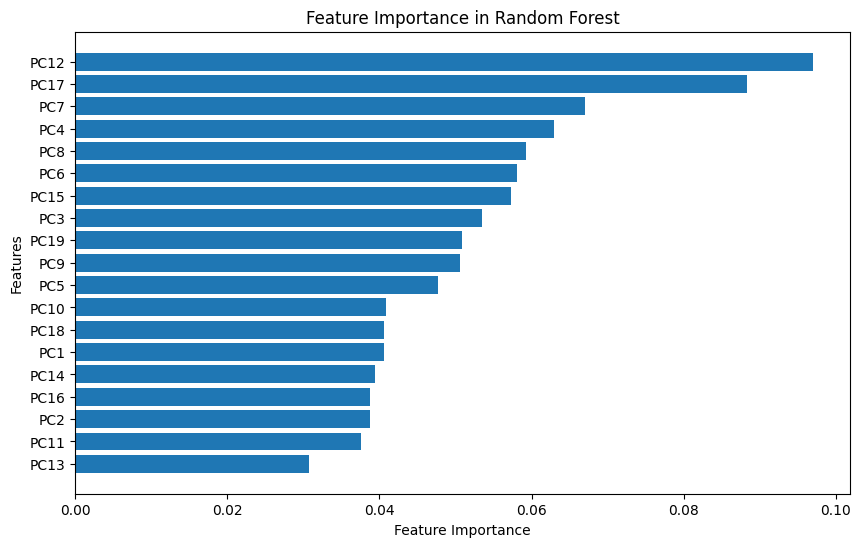

In [169]:
best_model = rf_grid.best_estimator_
feature_importances = best_model.feature_importances_
features = np.array(list(pca_df_balanced.drop('ChurnStatus', axis=1).columns)) 

sorted_idx = np.argsort(feature_importances)[::-1]  
sorted_features = features[sorted_idx][::-1]
sorted_importances = feature_importances[sorted_idx][::-1]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

In [174]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(5,20,1)), 
              "min_samples_leaf": list(range(4,10,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params,scoring='accuracy', cv=5)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

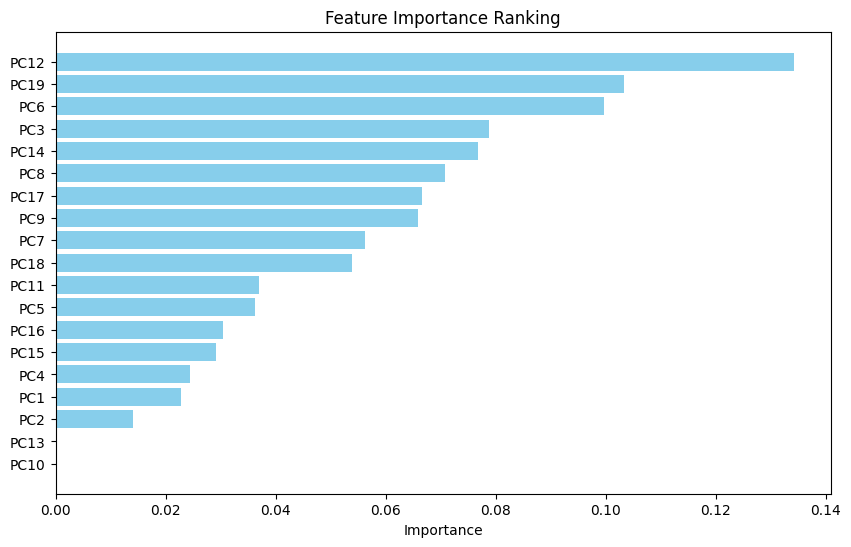

In [176]:
sorted_idx = np.argsort(tree_clf.feature_importances_)[::-1]
sorted_importances = tree_clf.feature_importances_[sorted_idx]
sorted_features = np.array(list(pca_df_balanced.drop('ChurnStatus', axis=1).columns))[sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()  
plt.show()


In [177]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)

In [178]:
#cross-validation 
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

randomforest_score = cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score', round(randomforest_score.mean() * 100, 2).astype(str) + '%')

gnb_score = cross_val_score(gnb_best, X_train, y_train, cv=5)
print('Naive Bayes Classifier Cross Validation Score', round(randomforest_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  53.68%
Knears Neighbors Cross Validation Score 54.3%
Random Forest Classifier Cross Validation Score 53.04%
Naive Bayes Classifier Cross Validation Score 53.04%
DecisionTree Classifier Cross Validation Score 53.39%


In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimators, estimator_names, X, y, ylim=None, cv=None,
                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    n_estimators = len(estimators)
    
    # Calculate the number of rows and columns for subplots based on the number of estimators
    cols = 2  
    rows = (n_estimators + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 7), sharey=True)
    axes = axes.ravel()  # Flatten the axes array for easy iteration
    
    for idx, (estimator, name) in enumerate(zip(estimators, estimator_names)):
        if ylim is not None:
            plt.ylim(*ylim)
        
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        axes[idx].fill_between(train_sizes, train_scores_mean - train_scores_std,
                               train_scores_mean + train_scores_std, alpha=0.1,
                               color="#ff9124")
        axes[idx].fill_between(train_sizes, test_scores_mean - test_scores_std,
                               test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
        axes[idx].plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
                       label="Training score")
        axes[idx].plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
                       label="Cross-validation score")
        axes[idx].set_title(f"{name} Learning Curve", fontsize=14)
        axes[idx].set_xlabel('Training size (m)')
        axes[idx].set_ylabel('Score')
        axes[idx].grid(True)
        axes[idx].legend(loc="best")
    
    # Hide any unused subplots
    if len(axes) > n_estimators:
        for i in range(n_estimators, len(axes)):
            fig.delaxes(axes[i])
    
    plt.tight_layout()
    return plt




/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_mod

<module 'matplotlib.pyplot' from '/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/matplotlib/pyplot.py'>

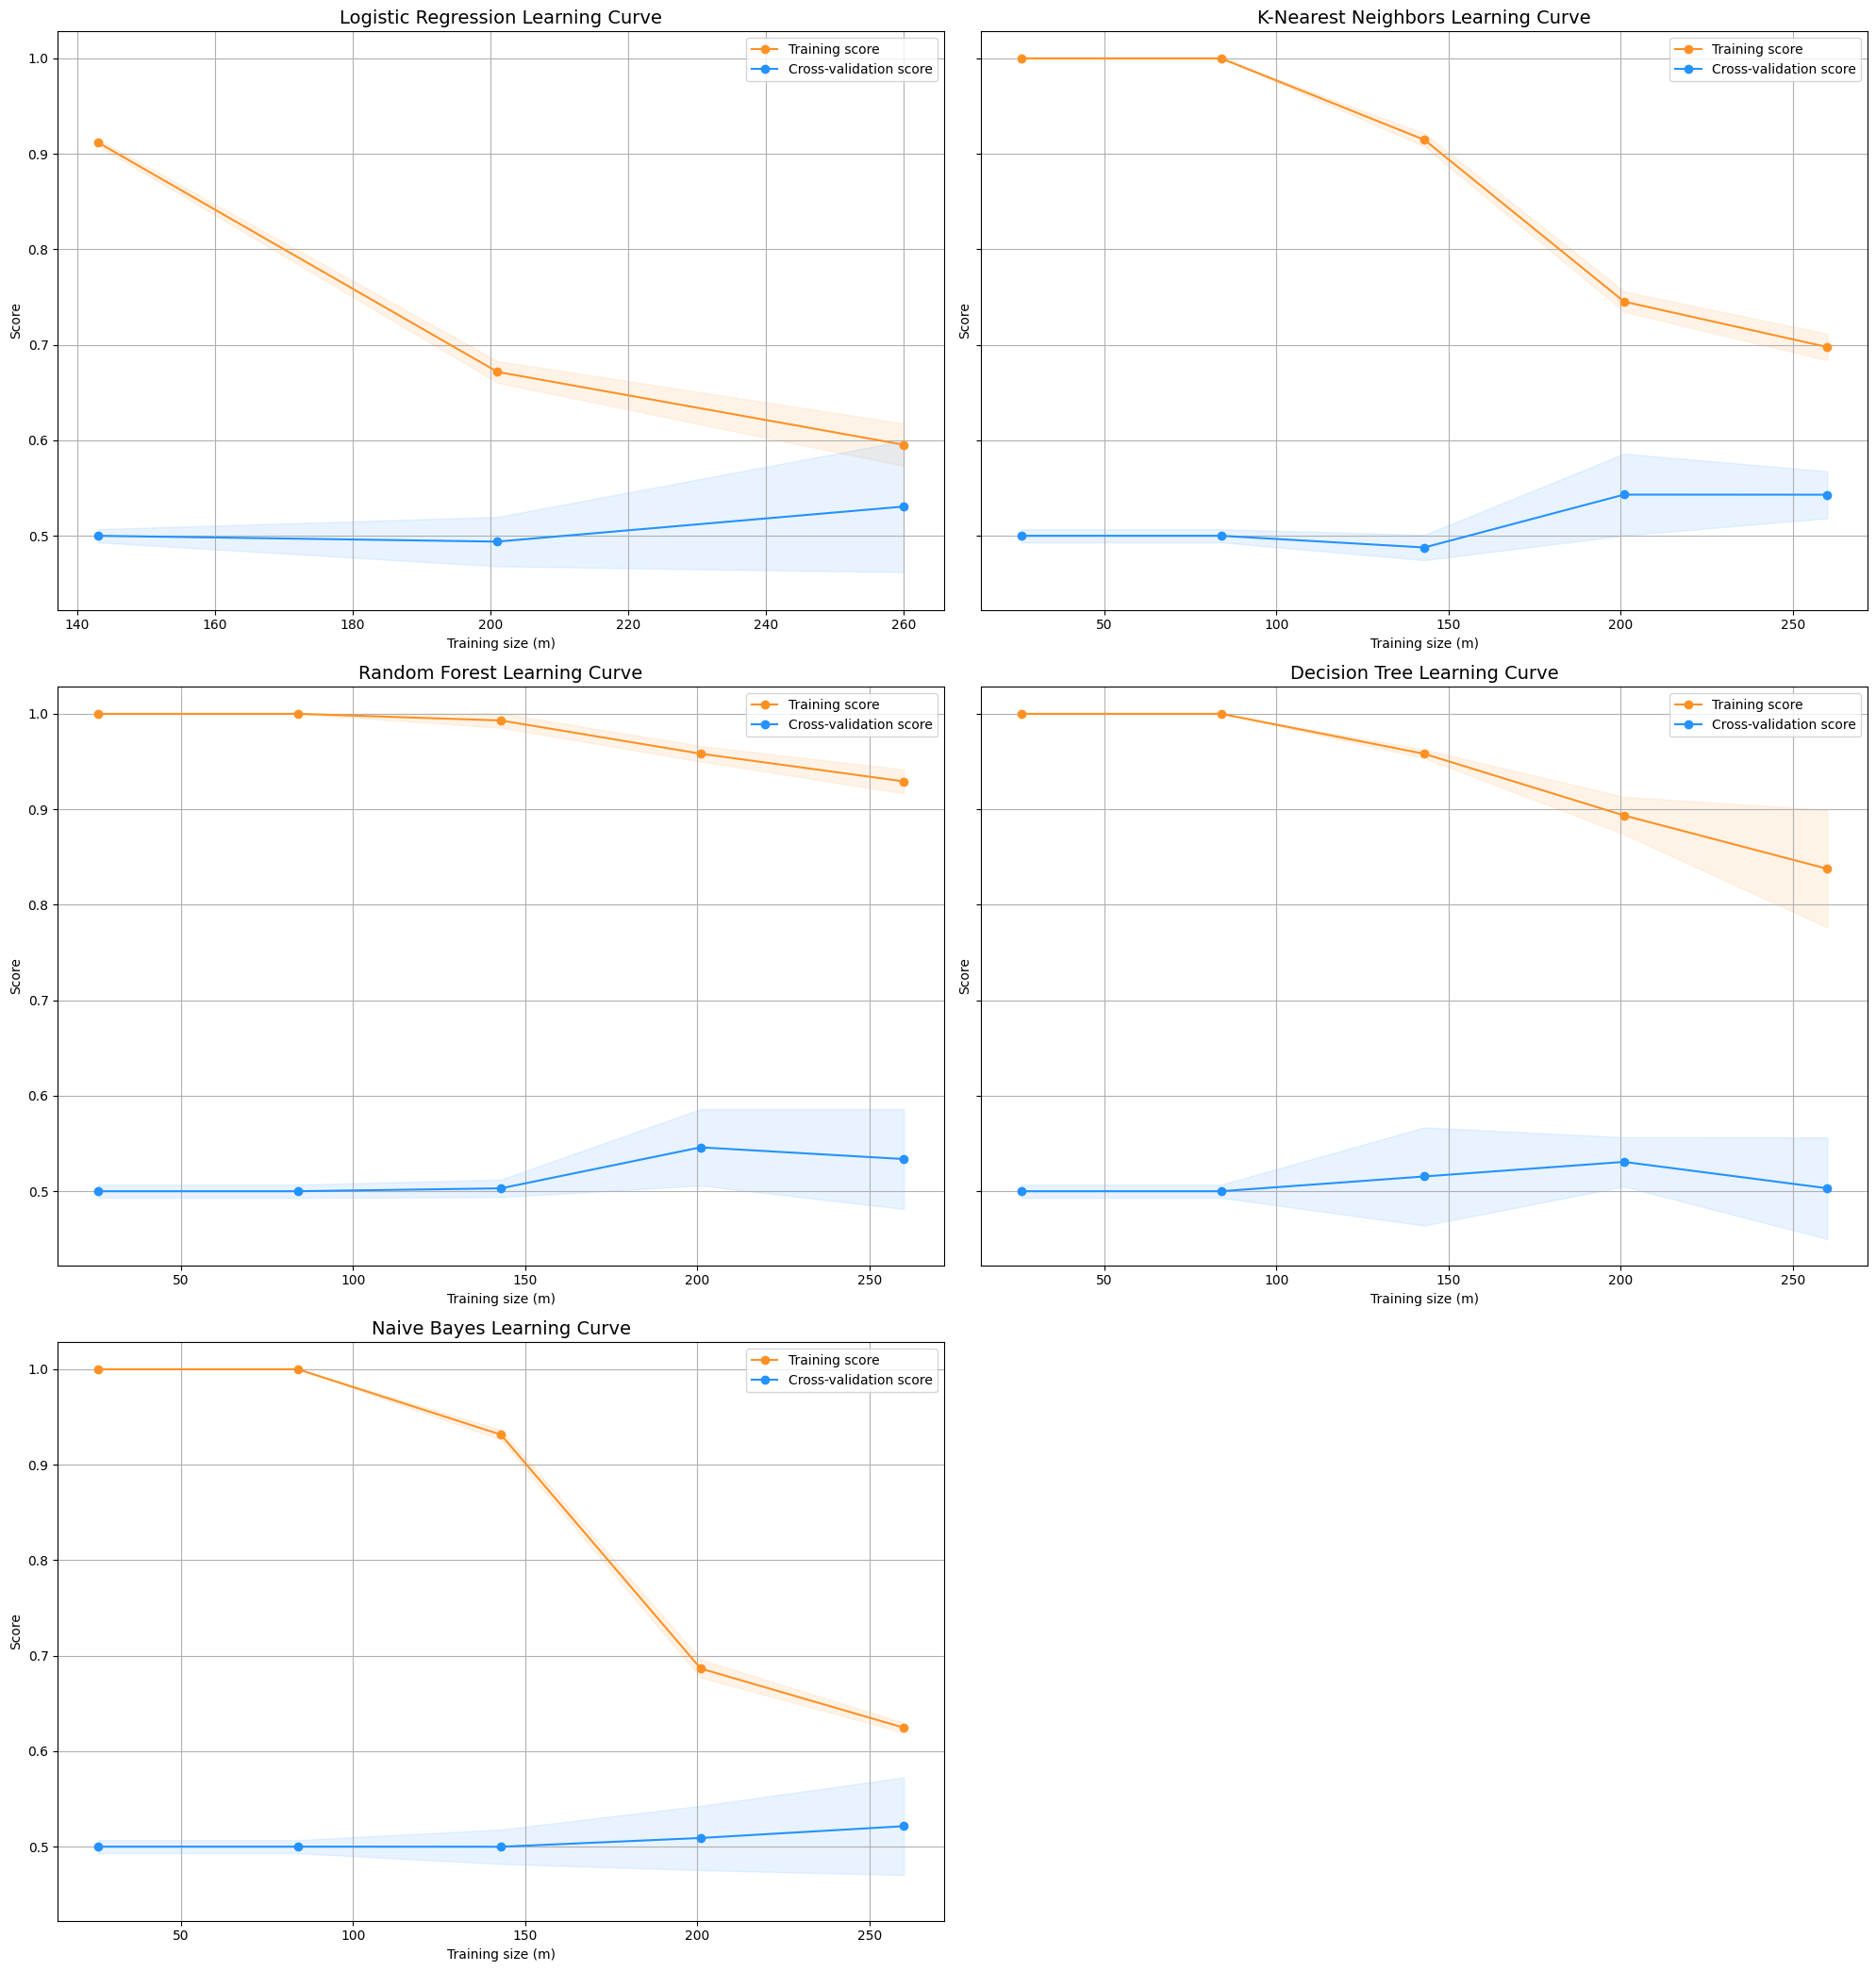

In [181]:
estimators = [log_reg, knears_neighbors, best_model, tree_clf,gnb]
estimator_names = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Decision Tree","Naive Bayes"]
plot_learning_curves(estimators, estimator_names, X_train, y_train)